In [5]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import subprocess
from utils.station_utils import apply_aggregation, statistics, calculate_uv, plot_variable_over_time, plot_hist, plot_event_comparison 

pd.set_option("display.max_columns",30)

# Analysis

## Overview

In [6]:
barbados_processed_df = pd.read_csv("station_data_processed/barbados_hourly_processed_data.csv", index_col=0)
barbados_processed_df.index = pd.to_datetime(barbados_processed_df.index, errors='coerce')



In [4]:
# Apply the function to each row and join the result to the original DataFrame
barbados_processed_df[['u_wind', 'v_wind']] = barbados_processed_df.apply(calculate_uv, axis=1)

barbados_processed_df

KeyboardInterrupt: 

In [ ]:
barbados_processed_df["wind_dir"]


datetime
2020-06-08 15:37:00    NaN
2020-06-08 15:38:00    0.0
2020-06-08 15:39:00    0.0
2020-06-08 15:40:00    0.0
2020-06-08 15:41:00    0.0
                      ... 
2023-11-22 19:20:00    0.0
2023-11-22 19:21:00    0.0
2023-11-22 19:22:00    NaN
2023-11-22 19:23:00    NaN
2023-11-22 19:24:00    NaN
Name: wind_dir, Length: 1817508, dtype: float64

In [ ]:
# Apply the  aggregation
barbados_hourly_df = apply_aggregation(barbados_processed_df)

In [ ]:
barbados_hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30293 entries, 2020-06-08 15:00:00 to 2023-11-22 19:00:00
Freq: h
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bmp280_temp  19275 non-null  float64
 1   bmp280_pres  19260 non-null  float64
 2   bmp280_slp   19304 non-null  float64
 3   htu_temp     19539 non-null  float64
 4   htu_hum      15417 non-null  float64
 5   mcp9808      17315 non-null  float64
 6   tipping      29008 non-null  float64
 7   vis_light    22612 non-null  float64
 8   ir_light     21491 non-null  float64
 9   uv_light     13230 non-null  float64
 10  wind_speed   26956 non-null  float64
dtypes: float64(11)
memory usage: 2.8 MB


In [ ]:
barbados_hourly_df.dropna(how='all', axis=1, inplace=True) 
barbados_hourly_df

bmp280_temp  bmp280_pres  bmp280_slp  htu_temp  htu_hum  \
datetime                                                                       
2020-06-08 15:00:00          NaN          NaN         NaN       NaN      NaN   
2020-06-08 16:00:00          NaN          NaN         NaN       NaN      NaN   
2020-06-08 17:00:00          NaN          NaN         NaN       NaN      NaN   
2020-06-08 18:00:00          NaN          NaN         NaN       NaN      NaN   
2020-06-08 19:00:00          NaN          NaN         NaN       NaN      NaN   
...                          ...          ...         ...       ...      ...   
2023-11-22 15:00:00        28.66      982.875    1013.750      10.4      NaN   
2023-11-22 16:00:00        29.05      982.170    1012.980      11.6      NaN   
2023-11-22 17:00:00        28.84      981.645    1012.470      11.7      NaN   
2023-11-22 18:00:00        28.37      981.230    1012.085      11.6      NaN   
2023-11-22 19:00:00        28.48      981.090    1011.920      11.5      NaN   

                     mcp9808  tipping  vis_light  ir_light  uv_light  \
datetime                                                               
2020-06-08 15:00:00      NaN      0.0        NaN       NaN       NaN   
2020-06-08 16:00:00      NaN      0.0        NaN       NaN       NaN   
2020-06-08 17:00:00      NaN      0.0        NaN       NaN       NaN   
2020-06-08 18:00:00      NaN      0.0        NaN       NaN       NaN   
2020-06-08 19:00:00      NaN      NaN        NaN       NaN       NaN   
...                      ...      ...        ...       ...       ...   
2023-11-22 15:00:00    27.30      0.0      845.0    6304.5     315.0   
2023-11-22 16:00:00    27.60      0.0      923.0    7158.5     356.5   
2023-11-22 17:00:00    27.40      0.0      730.0    5044.5     253.5   
2023-11-22 18:00:00    26.95      0.0      589.0    3605.0     178.0   
2023-11-22 19:00:00    27.00      0.0      554.0    3272.0     159.0   

                     wind_speed  
datetime                         
2020-06-08 15:00:00         NaN  
2020-06-08 16:00:00         NaN  
2020-06-08 17:00:00         NaN  
2020-06-08 18:00:00         NaN  
2020-06-08 19:00:00         NaN  
...                         ...  
2023-11-22 15:00:00    2.128167  
2023-11-22 16:00:00    2.052167  
2023-11-22 17:00:00    2.274000  
2023-11-22 18:00:00    2.291500  
2023-11-22 19:00:00    2.121905  

[30293 rows x 11 columns]

In [ ]:
barbados_hourly_df.dropna(how='all', axis=1, inplace=True) 
barbados_hourly_df.to_csv("station_data_processed/barbados_hourly_aggregated_data.csv", index=True)
print(barbados_hourly_df.index)
print(barbados_hourly_df.index.dtype)

DatetimeIndex(['2020-06-08 15:00:00', '2020-06-08 16:00:00',
               '2020-06-08 17:00:00', '2020-06-08 18:00:00',
               '2020-06-08 19:00:00', '2020-06-08 20:00:00',
               '2020-06-08 21:00:00', '2020-06-08 22:00:00',
               '2020-06-08 23:00:00', '2020-06-09 00:00:00',
               ...
               '2023-11-22 10:00:00', '2023-11-22 11:00:00',
               '2023-11-22 12:00:00', '2023-11-22 13:00:00',
               '2023-11-22 14:00:00', '2023-11-22 15:00:00',
               '2023-11-22 16:00:00', '2023-11-22 17:00:00',
               '2023-11-22 18:00:00', '2023-11-22 19:00:00'],
              dtype='datetime64[ns]', name='datetime', length=30293, freq='h')
datetime64[ns]


In [7]:
barbados_hourly_df = pd.read_csv("station_data_processed/barbados_hourly_aggregated_data.csv", index_col=0,  parse_dates=True)


In [12]:
barbados_hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30293 entries, 2020-06-08 15:00:00 to 2023-11-22 19:00:00
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bmp280_temp  19275 non-null  float64
 1   bmp280_pres  19260 non-null  float64
 2   bmp280_slp   19304 non-null  float64
 3   htu_temp     19539 non-null  float64
 4   htu_hum      15417 non-null  float64
 5   mcp9808      17315 non-null  float64
 6   tipping      29008 non-null  float64
 7   vis_light    22612 non-null  float64
 8   ir_light     21491 non-null  float64
 9   uv_light     13230 non-null  float64
 10  wind_speed   26956 non-null  float64
dtypes: float64(11)
memory usage: 2.8 MB


In [13]:
barbados_hourly_df.describe()

bmp280_temp   bmp280_pres    bmp280_slp      htu_temp       htu_hum  \
count  19275.000000  19260.000000  19304.000000  19539.000000  15417.000000   
mean      26.363526    984.922852   1015.581027     22.188743     85.960735   
std        1.966420      1.839035     11.953170      6.201811      8.186707   
min      -21.155000    910.800000    669.320000      1.500000     55.900000   
25%       24.975000    983.835000   1014.975000     21.900000     80.150000   
50%       26.160000    985.005000   1016.210000     24.400000     86.900000   
75%       27.660000    986.125000   1017.370000     26.200000     92.550000   
max       33.410000    990.780000   1021.940000     31.100000     99.800000   

            mcp9808       tipping     vis_light      ir_light      uv_light  \
count  17315.000000  29008.000000  22612.000000  21491.000000  13230.000000   
mean      25.587465      0.193285    419.594529   1990.336373    147.866062   
std        2.002858      1.341190    228.350229   2400.179046    129.135906   
min       19.800000      0.000000      0.000000      0.000000      0.000000   
25%       24.200000      0.000000    260.000000    253.500000     29.000000   
50%       25.400000      0.000000    266.500000    499.000000    124.500000   
75%       27.100000      0.000000    536.625000   3262.250000    227.000000   
max       32.200000     66.200000   1221.000000  10258.500000    516.500000   

         wind_speed  
count  26956.000000  
mean       3.065972  
std        2.429038  
min        0.001000  
25%        1.963417  
50%        2.895667  
75%        3.824583  
max       74.617241

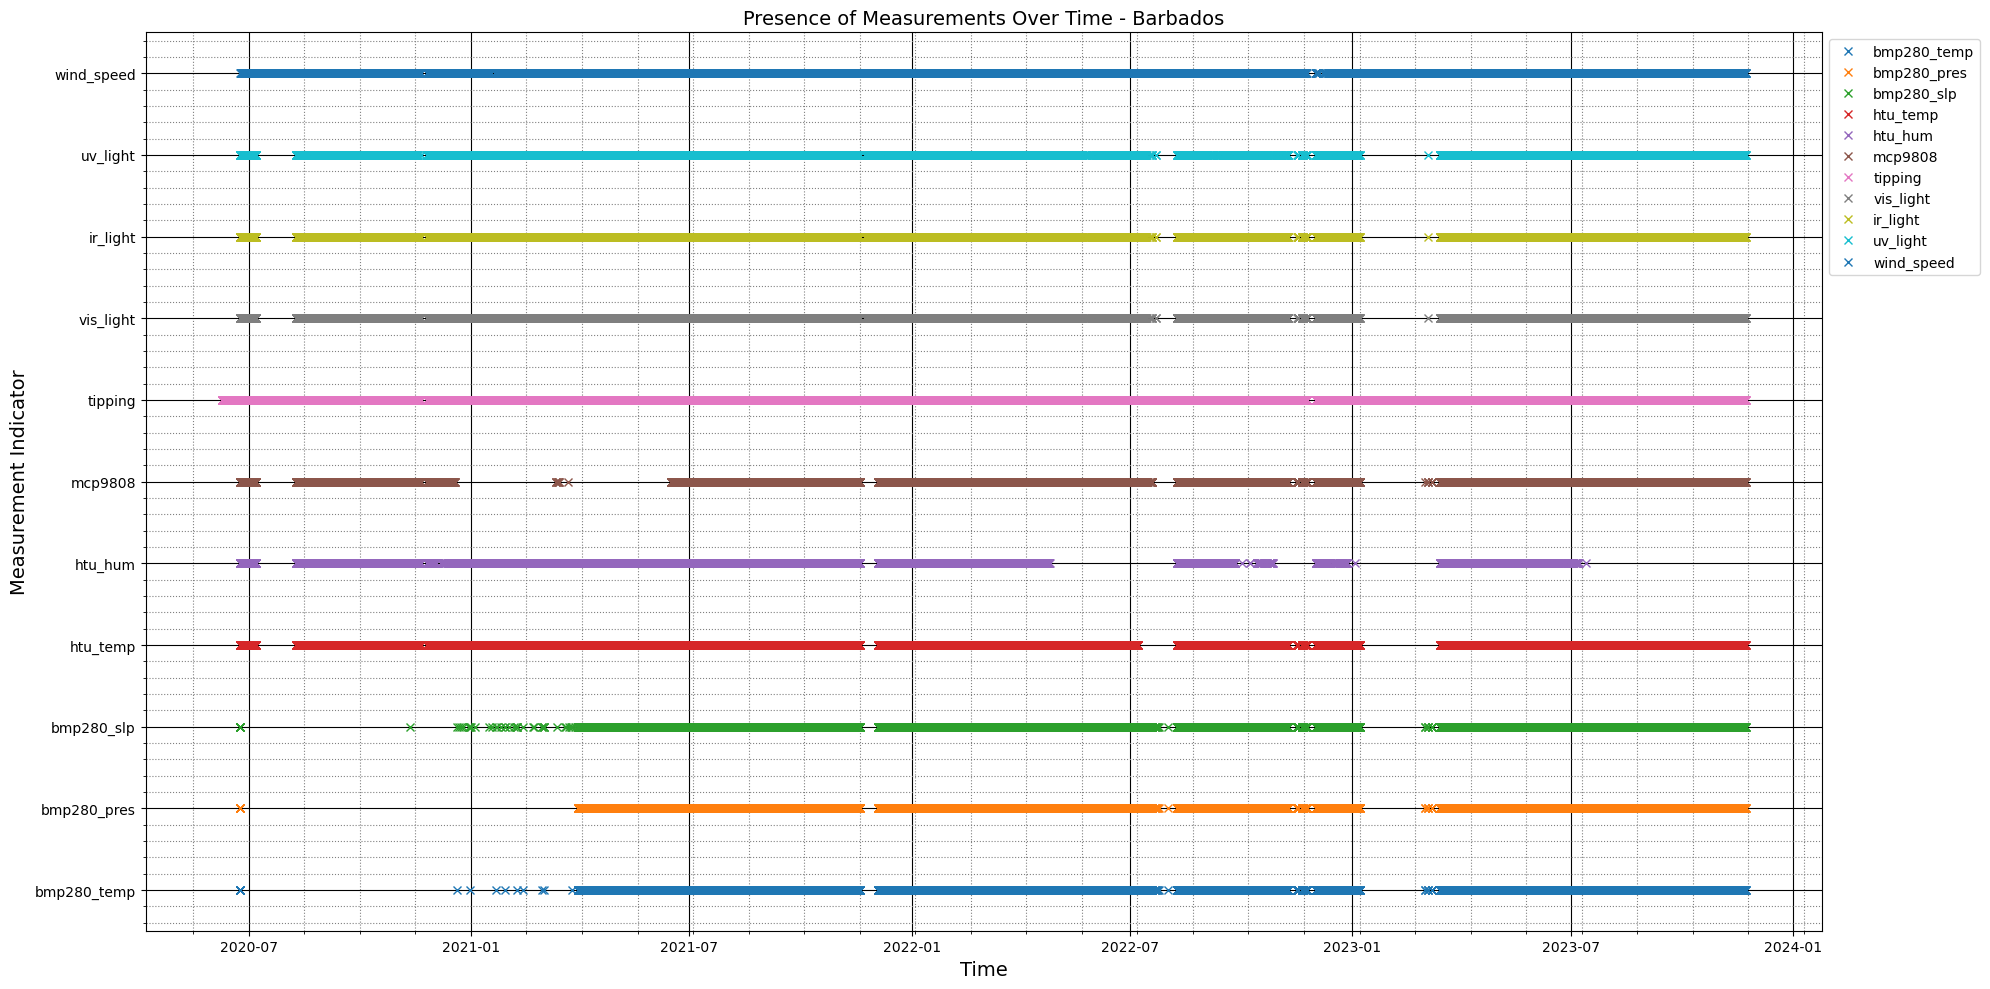

In [14]:
for i, column in enumerate(barbados_hourly_df.columns, start=1):
    marker_column = f"{column}_marker"
    # Assign 'i' where data is present, else NaN
    barbados_hourly_df[marker_column] = barbados_hourly_df[column].notna().map({True: i, False: np.nan})

# Initialize the plot
plt.figure(figsize=(20, 10))

# Plot each marker column with a unique vertical offset
for column in barbados_hourly_df.columns:
    if column.endswith('_marker'):
        plt.plot(
            barbados_hourly_df.index,
            barbados_hourly_df[column],
            marker='x',
            linestyle='',
            label=column.replace('_marker', '')
        )

# Customize the plot
plt.xlabel('Time',fontsize=14)
# plt.xticks(rotation=45)
plt.ylabel('Measurement Indicator', fontsize=14)
plt.title('Presence of Measurements Over Time - Barbados',fontsize=14)
plt.yticks(range(1, len(barbados_hourly_df.columns)//2 + 1), barbados_hourly_df.columns[:len(barbados_hourly_df.columns)//2])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.minorticks_on()
# Configure Major Grid Lines
plt.grid(which='major', linestyle='-', color='black')
# Configure Minor Grid Lines
plt.grid(which='minor', linestyle=':', color='gray')
plt.tight_layout()
plt.show()

## Statistics

In [15]:
summary = statistics(barbados_hourly_df["mcp9808"])


Total hours: 30293
Total hours: 100%
Actual measurements: 17315
Relative measurements: 57.16%
Non-zero measurements: 17315
Relative non-zero measurements: 57.16%
Non-zero relative to actual: 100.00%
Zero measurements: 0
NaN measurements: 12978


In [16]:
summary = statistics(barbados_hourly_df["tipping"])


Total hours: 30293
Total hours: 100%
Actual measurements: 29008
Relative measurements: 95.76%
Non-zero measurements: 2868
Relative non-zero measurements: 9.47%
Non-zero relative to actual: 9.89%
Zero measurements: 26140
NaN measurements: 1285


In [17]:
summary = statistics(barbados_hourly_df["wind_speed"])


Total hours: 30293
Total hours: 100%
Actual measurements: 26956
Relative measurements: 88.98%
Non-zero measurements: 26956
Relative non-zero measurements: 88.98%
Non-zero relative to actual: 100.00%
Zero measurements: 0
NaN measurements: 3337


In [18]:
summary = statistics(barbados_hourly_df["bmp280_pres"])


Total hours: 30293
Total hours: 100%
Actual measurements: 19260
Relative measurements: 63.58%
Non-zero measurements: 19260
Relative non-zero measurements: 63.58%
Non-zero relative to actual: 100.00%
Zero measurements: 0
NaN measurements: 11033


In [19]:
summary = statistics(barbados_hourly_df["htu_hum"])


Total hours: 30293
Total hours: 100%
Actual measurements: 15417
Relative measurements: 50.89%
Non-zero measurements: 15417
Relative non-zero measurements: 50.89%
Non-zero relative to actual: 100.00%
Zero measurements: 0
NaN measurements: 14876


## Histogram

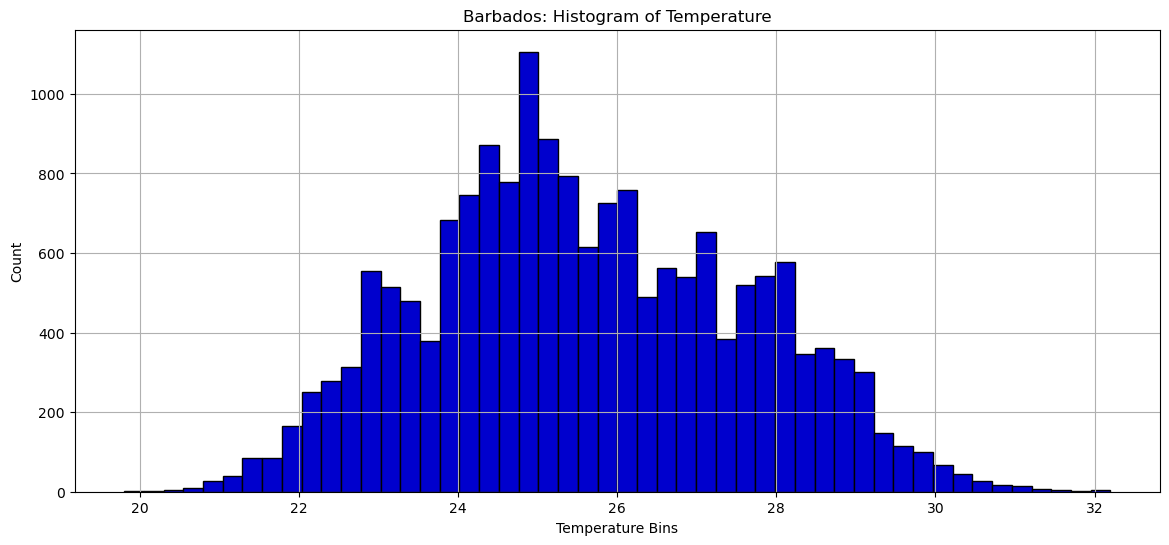

In [20]:
plot_hist(barbados_hourly_df, "mcp9808", "Barbados", save=False)

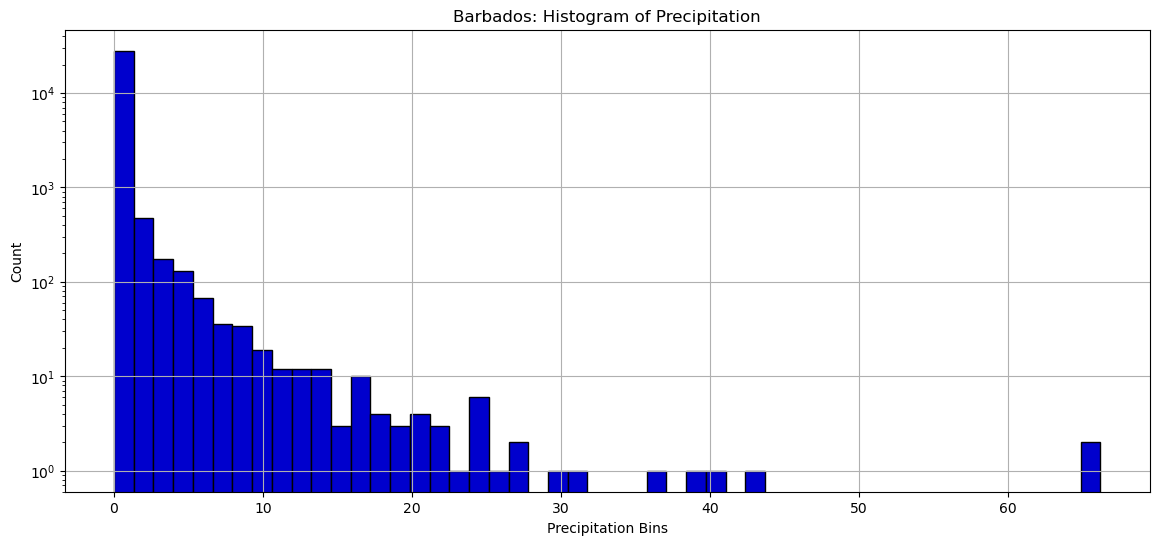

In [21]:
plot_hist(barbados_hourly_df, "tipping", "Barbados", save=False, log=True)

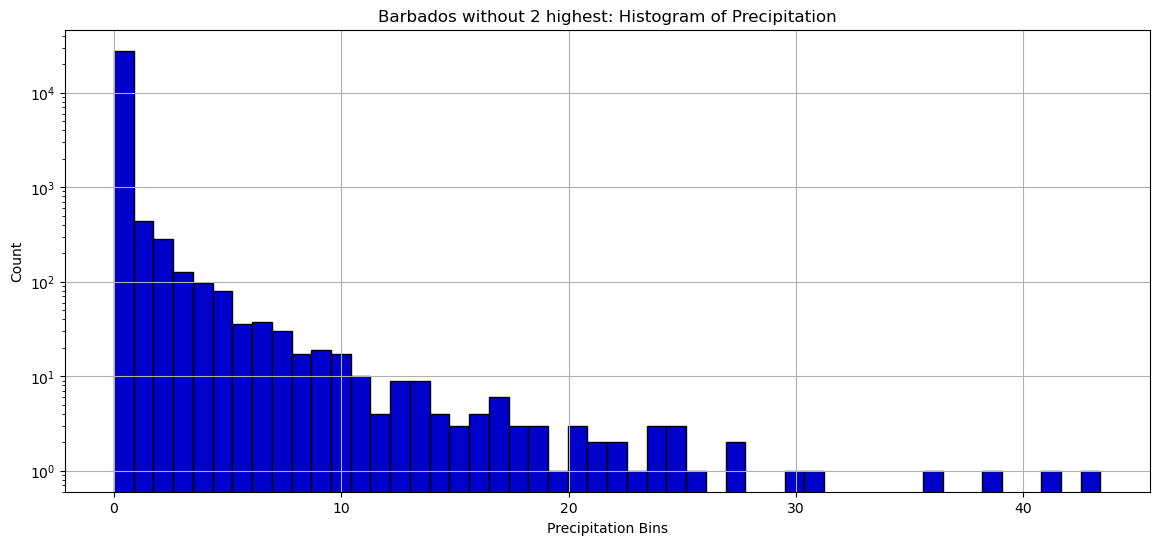

In [22]:
x = 2  # Number of rows to drop

# Sort by the column in descending order and drop the top x rows
df_dropped = barbados_hourly_df.sort_values(by="tipping", ascending=False).iloc[x:]

# Reset index if needed
df_dropped = df_dropped.reset_index(drop=True)

plot_hist(df_dropped, "tipping", "Barbados without 2 highest", save=False, log=True)

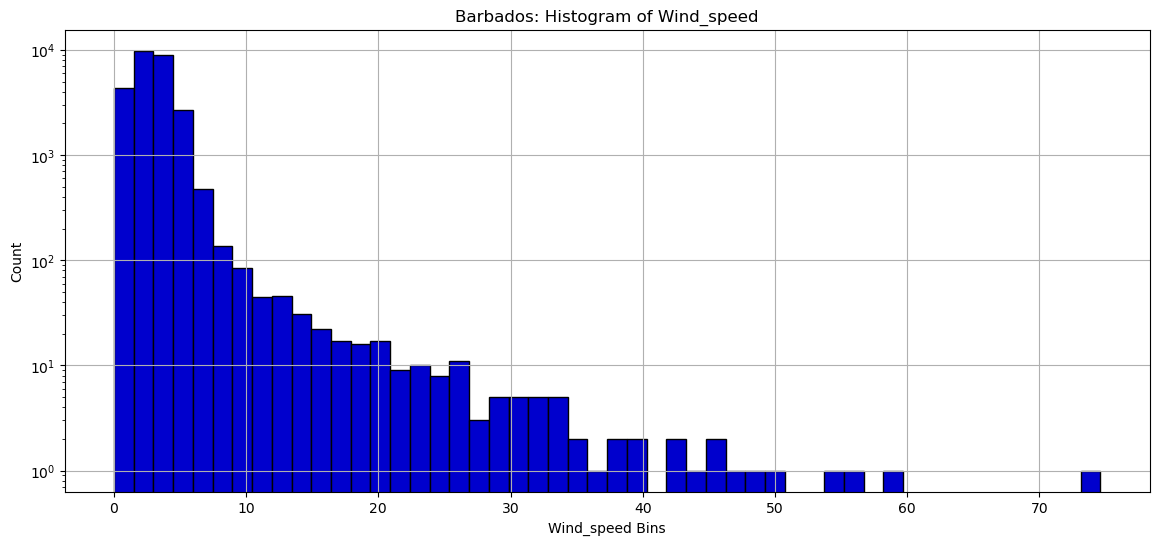

In [23]:
plot_hist(barbados_hourly_df, "wind_speed", "Barbados", save=False, log=True)

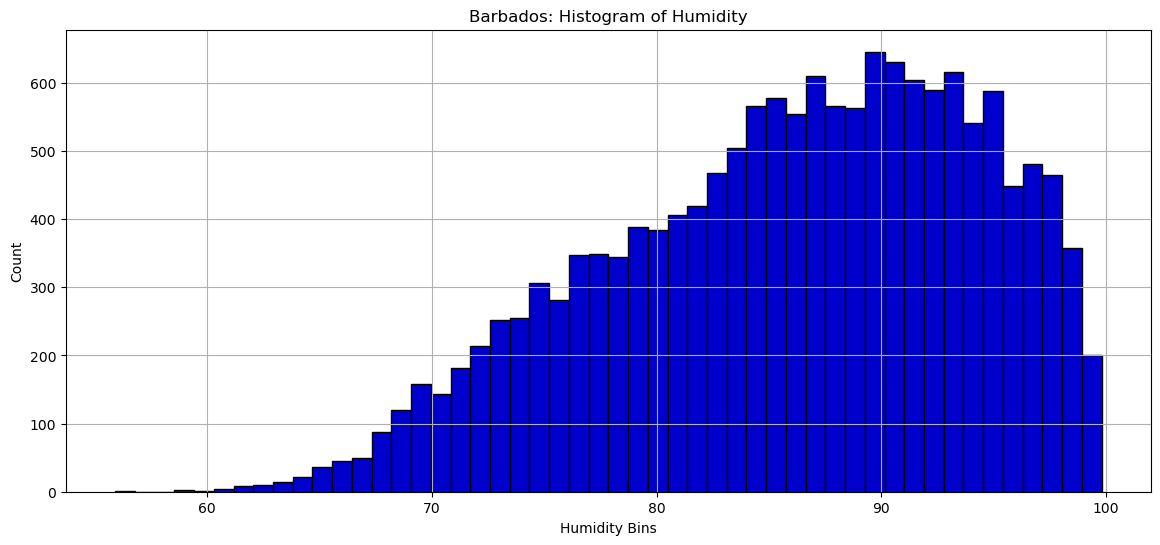

In [24]:
plot_hist(barbados_hourly_df, "htu_hum", "Barbados", save=False, log=False)

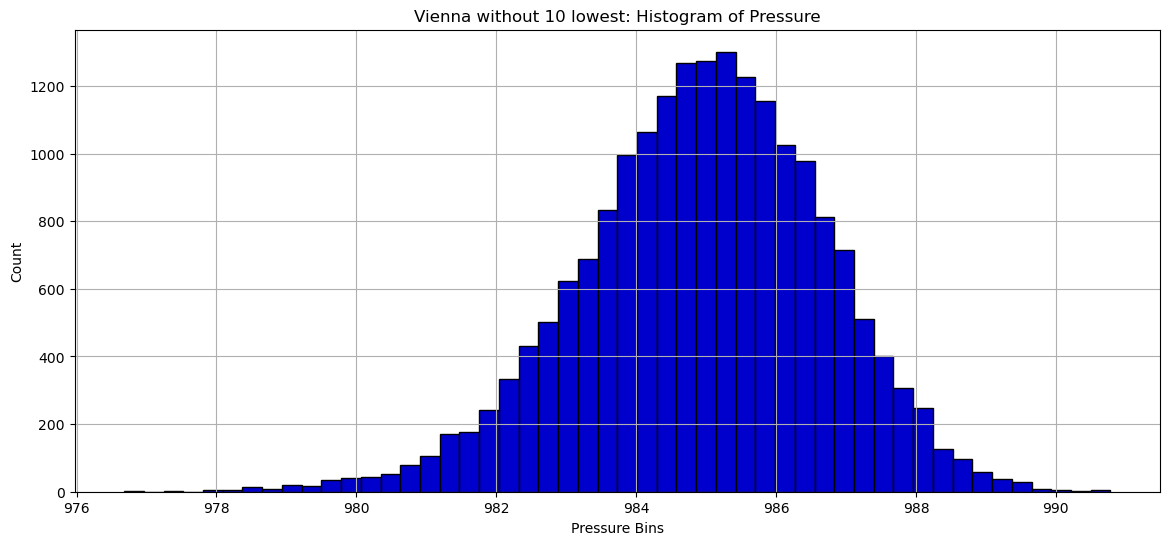

In [27]:
x= 10 # Number of rows to drop below lowest measurments

# Sort by the column in descending order and drop the top x rows
df_dropped = barbados_hourly_df.sort_values(by="bmp280_pres", ascending=True).iloc[x:]

# Reset index if needed
df_dropped = df_dropped.reset_index(drop=True)

plot_hist(df_dropped, "bmp280_pres", "Vienna without 10 lowest", save=False, log=False)


## Overview Plots

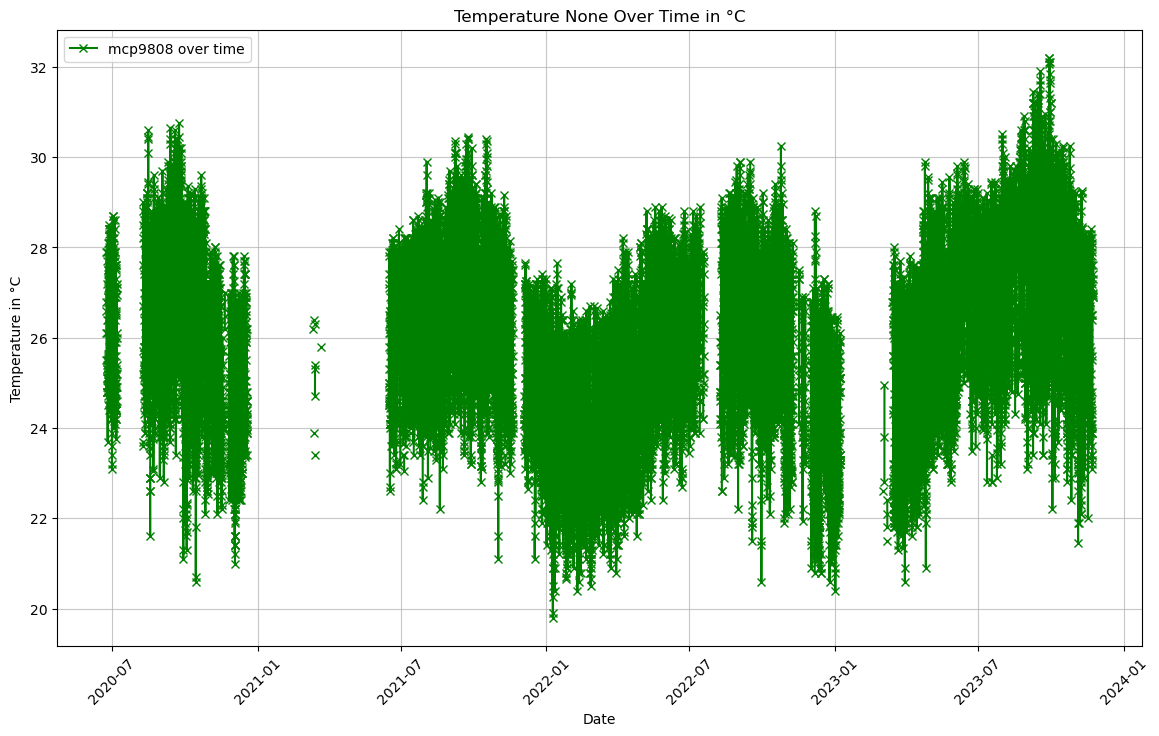

In [28]:
plot_variable_over_time(barbados_hourly_df, "mcp9808", year=None)


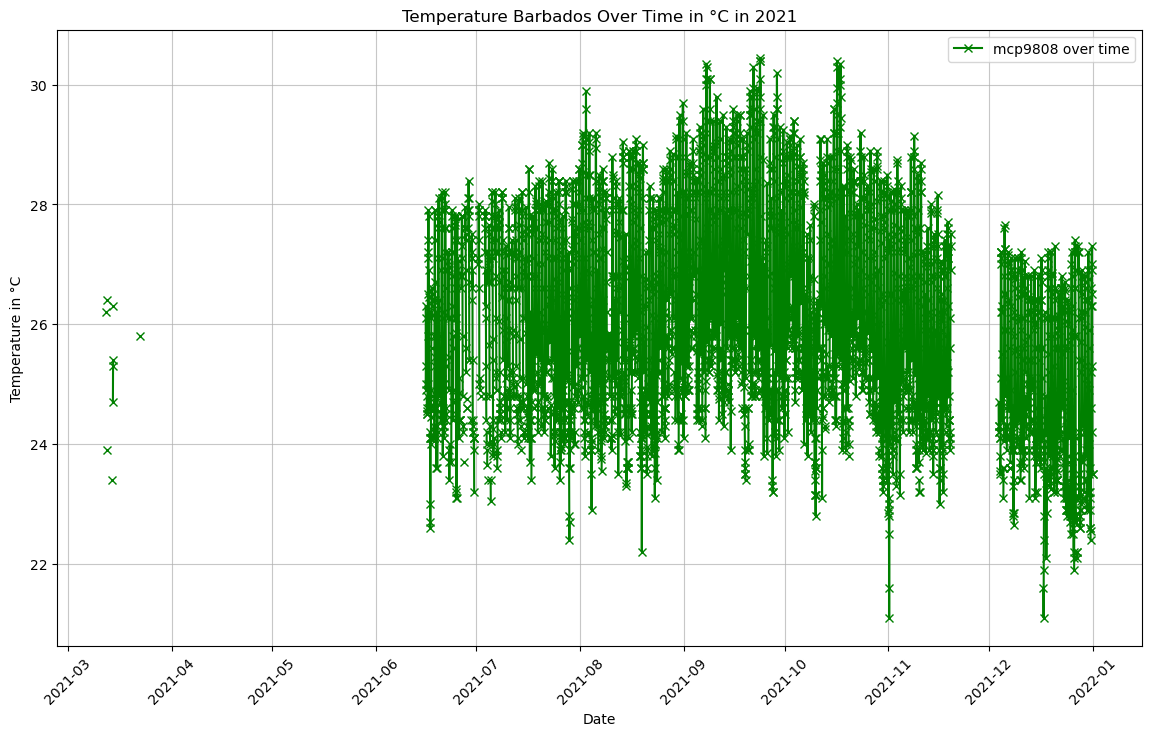

In [29]:
plot_variable_over_time(barbados_hourly_df, "mcp9808", year=2021, title_add_on = "Barbados")


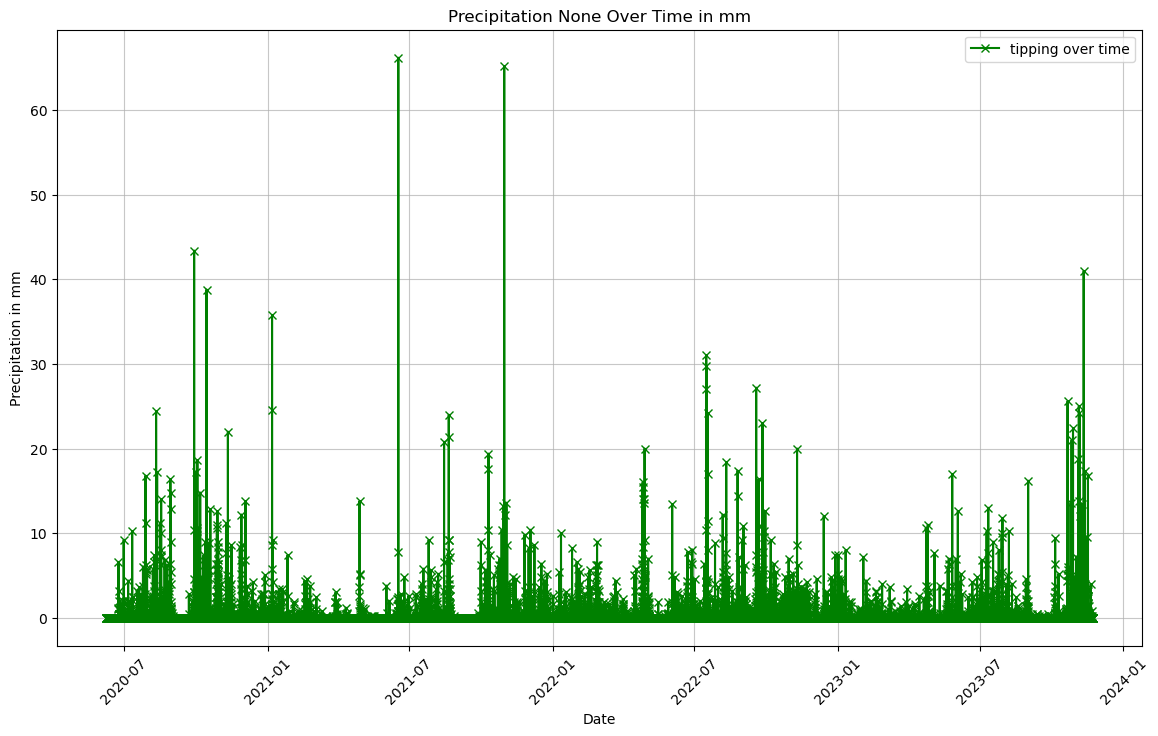

In [30]:
plot_variable_over_time(barbados_hourly_df, "tipping", year=None)


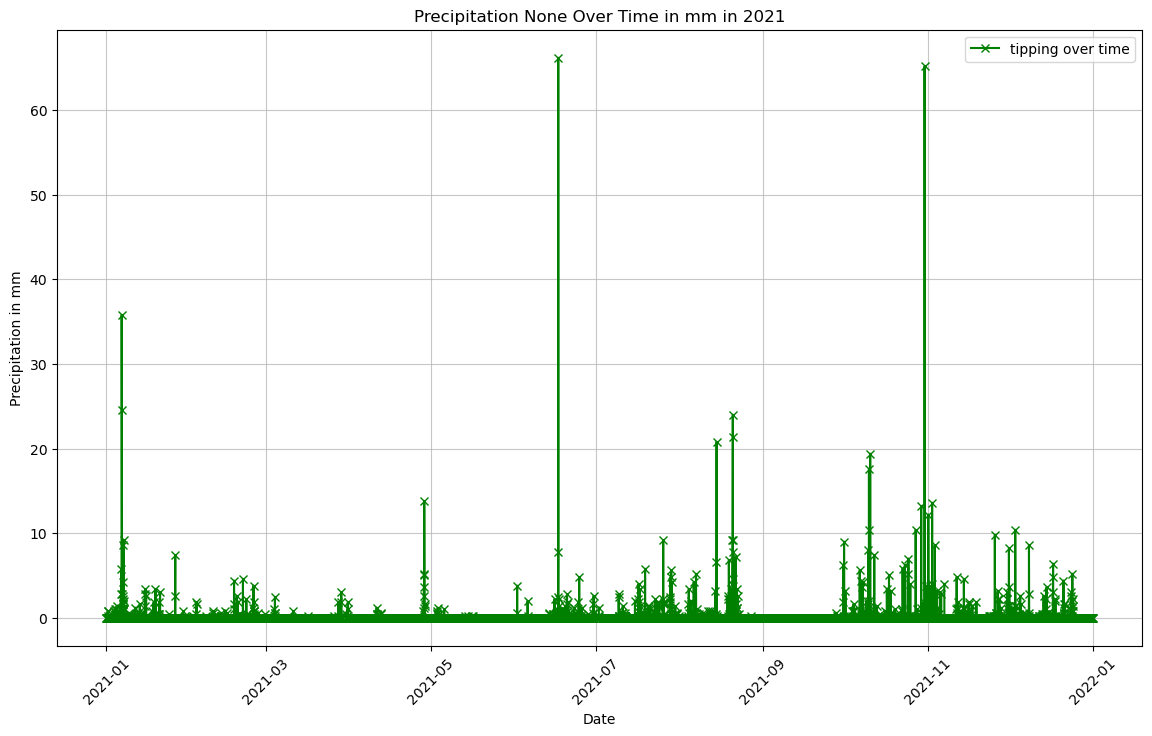

In [31]:
plot_variable_over_time(barbados_hourly_df, "tipping", year=2021)


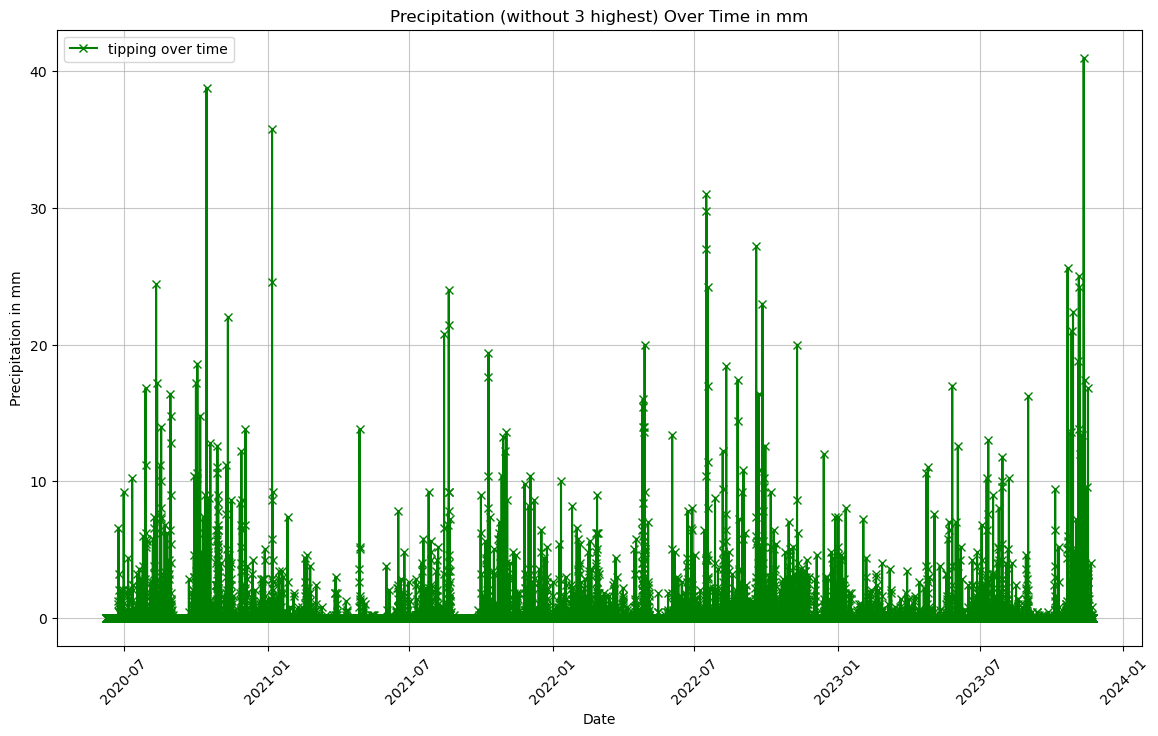

In [32]:
x = 3  # Number of rows to drop

# Sort by the column in descending order and drop the top x rows
top_values = barbados_hourly_df["tipping"].nlargest(x).values
df_filtered = barbados_hourly_df[~barbados_hourly_df["tipping"].isin(top_values)]

plot_variable_over_time(df_filtered, "tipping", year=None, title_add_on="(without 3 highest)")


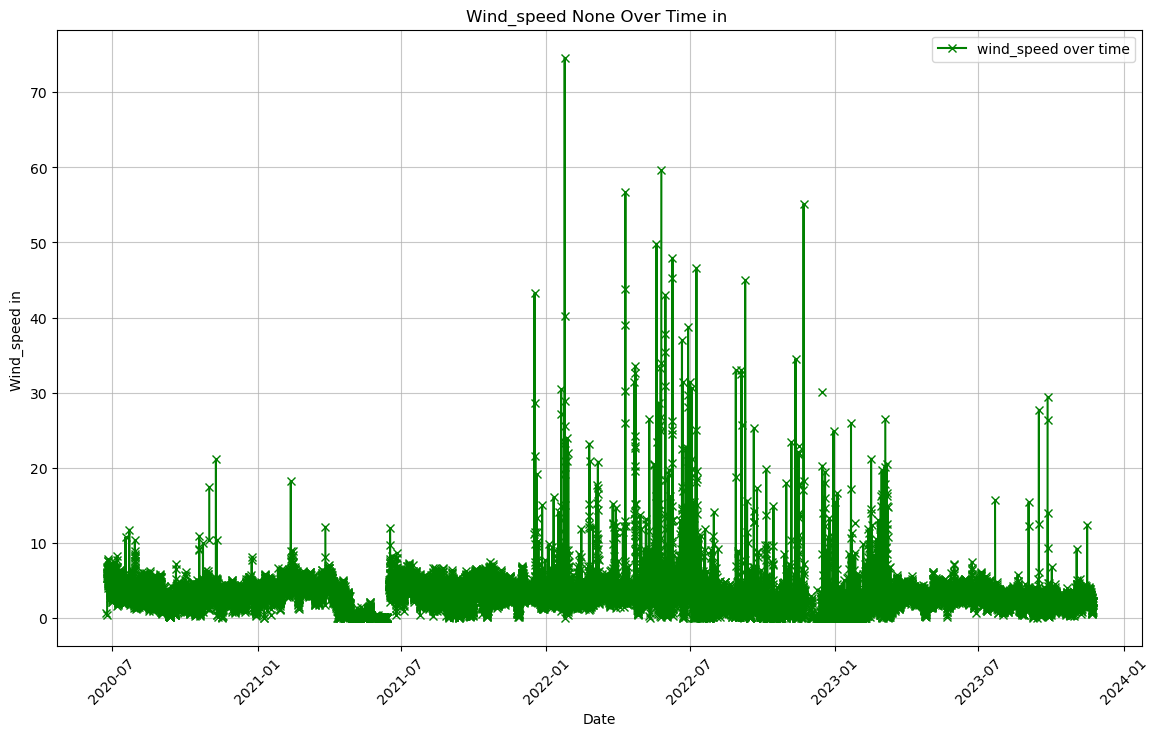

In [33]:
plot_variable_over_time(barbados_hourly_df, "wind_speed", year=None)


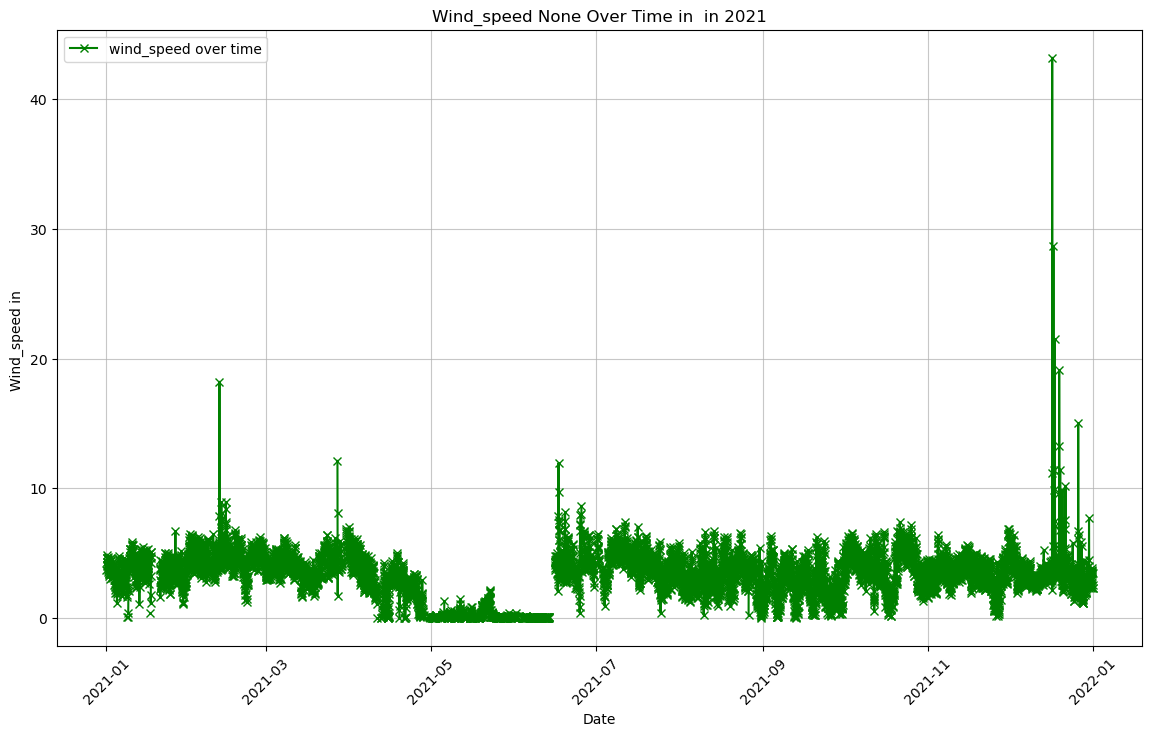

In [34]:
plot_variable_over_time(barbados_hourly_df, "wind_speed", year=2021)


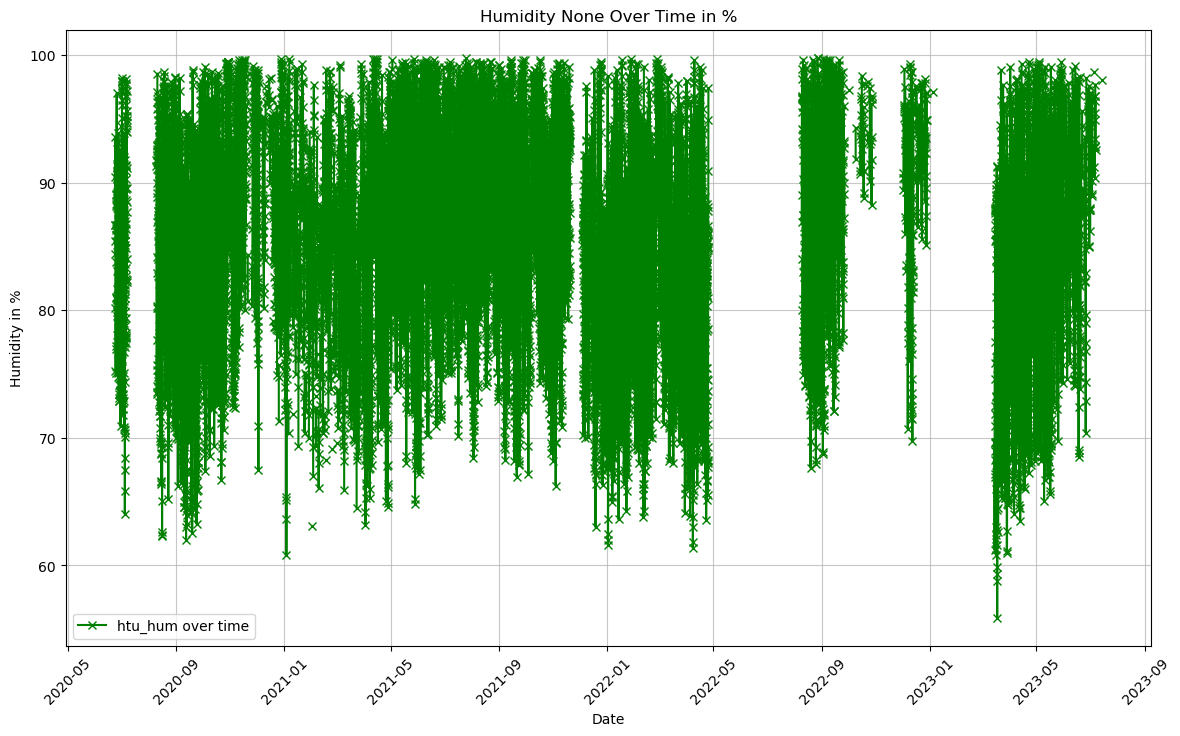

In [35]:
plot_variable_over_time(barbados_hourly_df, "htu_hum", year=None)


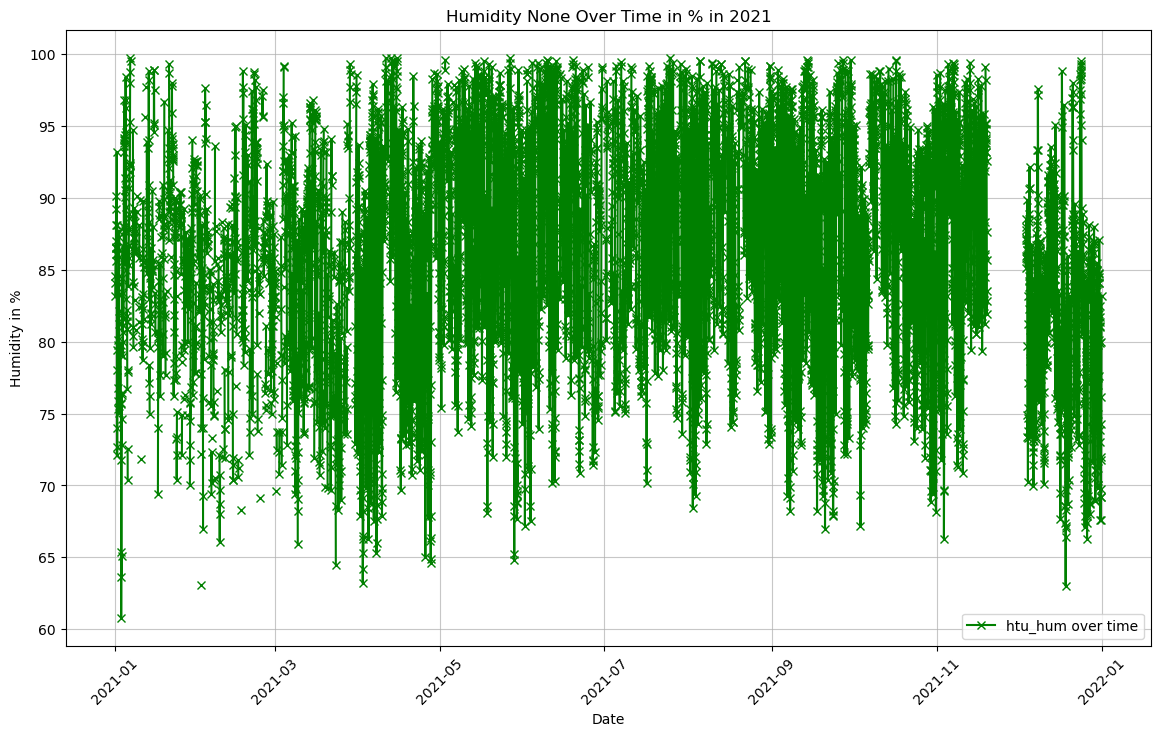

In [36]:
plot_variable_over_time(barbados_hourly_df, "htu_hum", year=2021)


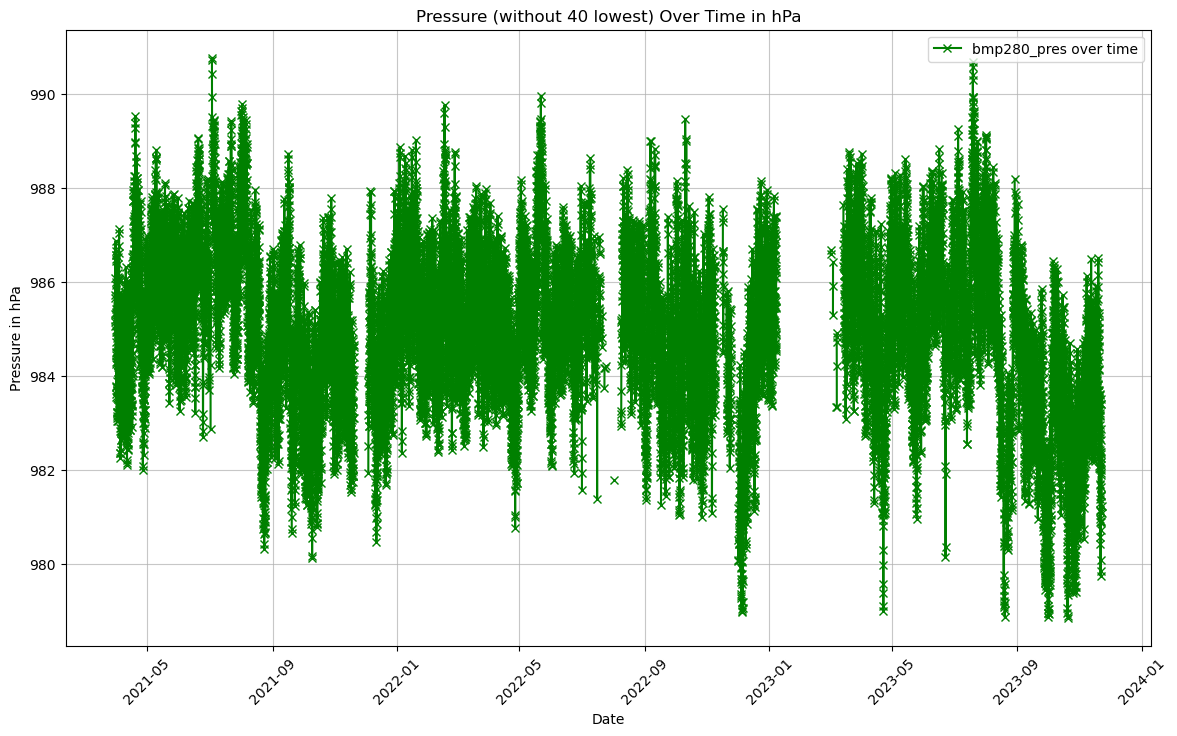

In [37]:

x = 40  # Number of rows to drop

# Sort by the column in descending order and drop the top x rows
top_values = barbados_hourly_df["bmp280_pres"].nsmallest(x).values
df_filtered = barbados_hourly_df[~barbados_hourly_df["bmp280_pres"].isin(top_values)]

plot_variable_over_time(df_filtered, "bmp280_pres", year=None, title_add_on="(without 40 lowest)")

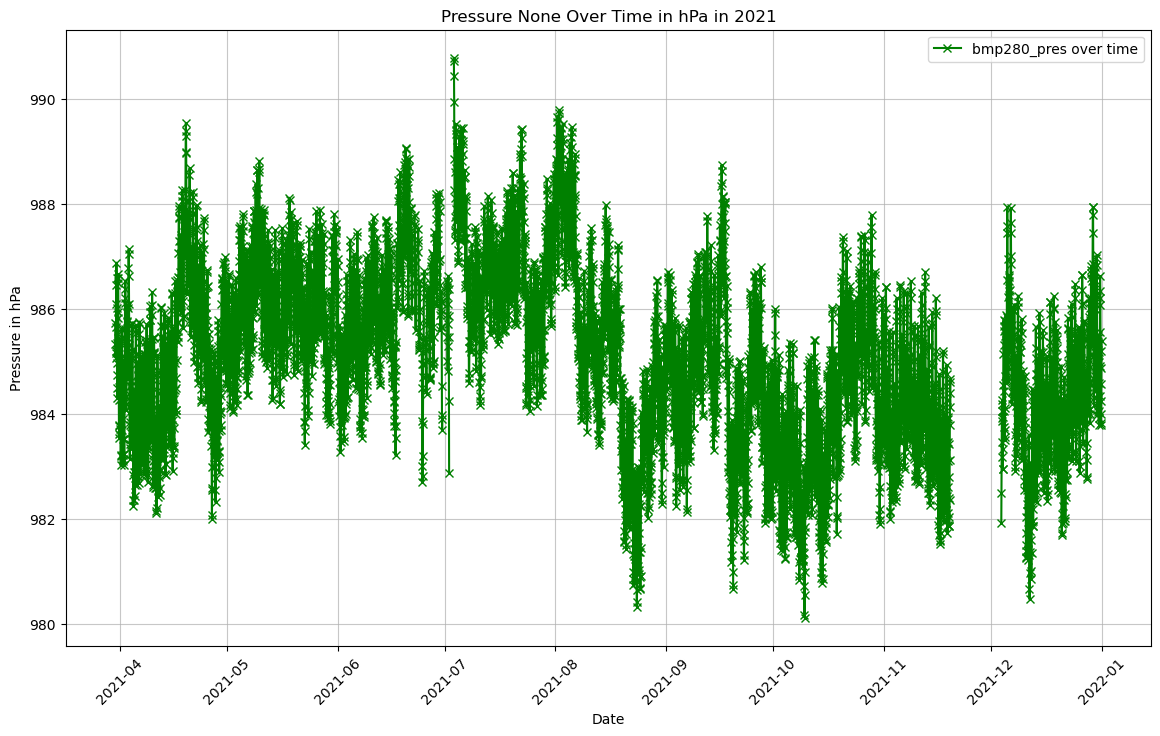

In [38]:
plot_variable_over_time(df_filtered, "bmp280_pres", year=2021)

# Events

In [55]:
def rename_variables(ds):
    variable_mapping = {
        'var167': 't2m',      # 2 metre temperature
        'var228': 'tp',       # Total precipitation
        'var165': 'u10',      # 10 metre U wind component
        'var166': 'v10',      # 10 metre V wind component
        # Add other mappings as needed
    }
    variables_to_rename = {var: new_var for var, new_var in variable_mapping.items() if var in ds.variables}
    ds = ds.rename(variables_to_rename)
    return ds

def scale_variables(ds):
    ds["2t"].values = ds["2t"].values - 273.15
    # ds["tp"].values = ds["tp"].values * 1000
    u10 = ds['10u']
    v10 = ds['10v']
    wind_speed = np.sqrt(u10 ** 2 + v10 ** 2)
    ds['wind_speed'] = wind_speed
    return ds

def convert_grib_to_nc( source_path):
    nc_copied_path = "converted_" + source_path 
    cdo_command = f"cdo -f nc copy {(source_path)} {nc_copied_path}"
    subprocess.run(cdo_command, shell=True, check=True)
    assert os.path.exists(nc_copied_path), "Conversion failed"

    # Open the NetCDF file and rename variables
    ds = xr.open_dataset(nc_copied_path)
    ds = rename_variables(ds)
    ds = scale_variables(ds)
    ds.to_netcdf(nc_copied_path)

In [76]:
convert_grib_to_nc("era5_data/era5_barbados_events.nc")


In [9]:
era5_barbados_ds = xr.open_dataset("era5_data/era5_barbados_allvar/barbados_all_var_2020_2024_renamed.nc")
#era5_barbados_ds = scale_variables(era5_barbados_ds)


In [75]:
era5_barbados_ds

<xarray.Dataset> Size: 347MB
Dimensions:     (time: 42783, lon: 17, lat: 17)
Coordinates:
  * time        (time) datetime64[ns] 342kB 2020-01-01 ... 2024-11-17T14:00:00
  * lon         (lon) float64 136B 298.5 298.7 299.0 299.2 ... 302.0 302.2 302.5
  * lat         (lat) float64 136B 15.17 14.91 14.66 14.41 ... 11.66 11.41 11.16
Data variables:
    10u         (time, lat, lon) float32 49MB -3.805 -4.012 ... -3.598 -4.517
    10v         (time, lat, lon) float32 49MB -0.1473 0.05403 ... 1.533 0.8897
    2d          (time, lat, lon) float32 49MB ...
    2t          (time, lat, lon) float32 49MB 26.75 26.31 26.62 ... 26.79 26.67
    sp          (time, lat, lon) float32 49MB ...
    tp          (time, lat, lon) float32 49MB 0.0 0.0 0.0 ... 0.2507 0.5328
    wind_speed  (time, lat, lon) float32 49MB 3.808 4.012 3.668 ... 3.911 4.604
Attributes:
    CDI:          Climate Data Interface version 2.4.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Tue Nov 26 15:37:19 2024: cdo -f nc4 copy era5_data/era5_ba...
    CDO:          Climate Data Operators version 2.4.2 (https://mpimet.mpg.de...

In [57]:
print("Highest precip. value in ERA5:",era5_barbados_ds.tp.values.max())
print("Highest temp. value in ERA5:",era5_barbados_ds["2t"].values.max())
print("Highest wind speed value in ERA5:",era5_barbados_ds.wind_speed.values.max())

Highest precip. value in ERA5: 30.256021
Highest temp. value in ERA5: 31.887177
Highest wind speed value in ERA5: 24.672457


## Precipitation

In [58]:
# 5 heaviest precipitation events
barbados_hourly_df.sort_values(by=['tipping'], ascending=False)


bmp280_temp  bmp280_pres  bmp280_slp  htu_temp  htu_hum  \
datetime                                                                       
2021-06-17 05:00:00       23.455      984.725    1016.205     22.55      NaN   
2021-10-30 18:00:00       28.675      982.080    1012.925     27.70     69.4   
2020-09-28 23:00:00          NaN          NaN         NaN     21.80      NaN   
2023-11-11 06:00:00       24.380      982.970    1014.275      6.95      NaN   
2020-10-14 20:00:00          NaN          NaN         NaN     20.70     97.7   
...                          ...          ...         ...       ...      ...   
2023-09-02 08:00:00          NaN          NaN         NaN       NaN      NaN   
2023-09-02 09:00:00          NaN          NaN         NaN       NaN      NaN   
2023-09-02 10:00:00          NaN          NaN         NaN       NaN      NaN   
2023-09-03 09:00:00          NaN          NaN         NaN       NaN      NaN   
2023-09-03 10:00:00          NaN          NaN         NaN       NaN      NaN   

                     mcp9808  tipping  vis_light  ir_light  uv_light  \
datetime                                                               
2021-06-17 05:00:00    22.70     66.2      260.0       NaN       NaN   
2021-10-30 18:00:00    28.15     65.2        NaN       NaN       NaN   
2020-09-28 23:00:00    22.00     43.4      261.0     253.0       NaN   
2023-11-11 06:00:00    22.90     41.0      260.0       NaN       NaN   
2020-10-14 20:00:00    20.60     38.8      274.0     374.0       9.0   
...                      ...      ...        ...       ...       ...   
2023-09-02 08:00:00      NaN      NaN        NaN       NaN       NaN   
2023-09-02 09:00:00      NaN      NaN        NaN       NaN       NaN   
2023-09-02 10:00:00      NaN      NaN        NaN       NaN       NaN   
2023-09-03 09:00:00      NaN      NaN        NaN       NaN       NaN   
2023-09-03 10:00:00      NaN      NaN        NaN       NaN       NaN   

                     wind_speed  bmp280_temp_marker  bmp280_pres_marker  \
datetime                                                                  
2021-06-17 05:00:00    7.842333                 1.0                 2.0   
2021-10-30 18:00:00    3.874500                 1.0                 2.0   
2020-09-28 23:00:00    1.686333                 NaN                 NaN   
2023-11-11 06:00:00    3.882333                 1.0                 2.0   
2020-10-14 20:00:00    3.926949                 NaN                 NaN   
...                         ...                 ...                 ...   
2023-09-02 08:00:00         NaN                 NaN                 NaN   
2023-09-02 09:00:00         NaN                 NaN                 NaN   
2023-09-02 10:00:00         NaN                 NaN                 NaN   
2023-09-03 09:00:00         NaN                 NaN                 NaN   
2023-09-03 10:00:00         NaN                 NaN                 NaN   

                     bmp280_slp_marker  htu_temp_marker  htu_hum_marker  \
datetime                                                                  
2021-06-17 05:00:00                3.0              4.0             NaN   
2021-10-30 18:00:00                3.0              4.0             5.0   
2020-09-28 23:00:00                NaN              4.0             NaN   
2023-11-11 06:00:00                3.0              4.0             NaN   
2020-10-14 20:00:00                NaN              4.0             5.0   
...                                ...              ...             ...   
2023-09-02 08:00:00                NaN              NaN             NaN   
2023-09-02 09:00:00                NaN              NaN             NaN   
2023-09-02 10:00:00                NaN              NaN             NaN   
2023-09-03 09:00:00                NaN              NaN             NaN   
2023-09-03 10:00:00                NaN              NaN             NaN   

                     mcp9808_marker  tipping_marker  vis_light_marker  \
datetime          

In [59]:
print(barbados_hourly_df.sort_values(by=['tipping'], ascending=False).index[0:5])


DatetimeIndex(['2021-06-17 05:00:00', '2021-10-30 18:00:00',
               '2020-09-28 23:00:00', '2023-11-11 06:00:00',
               '2020-10-14 20:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)


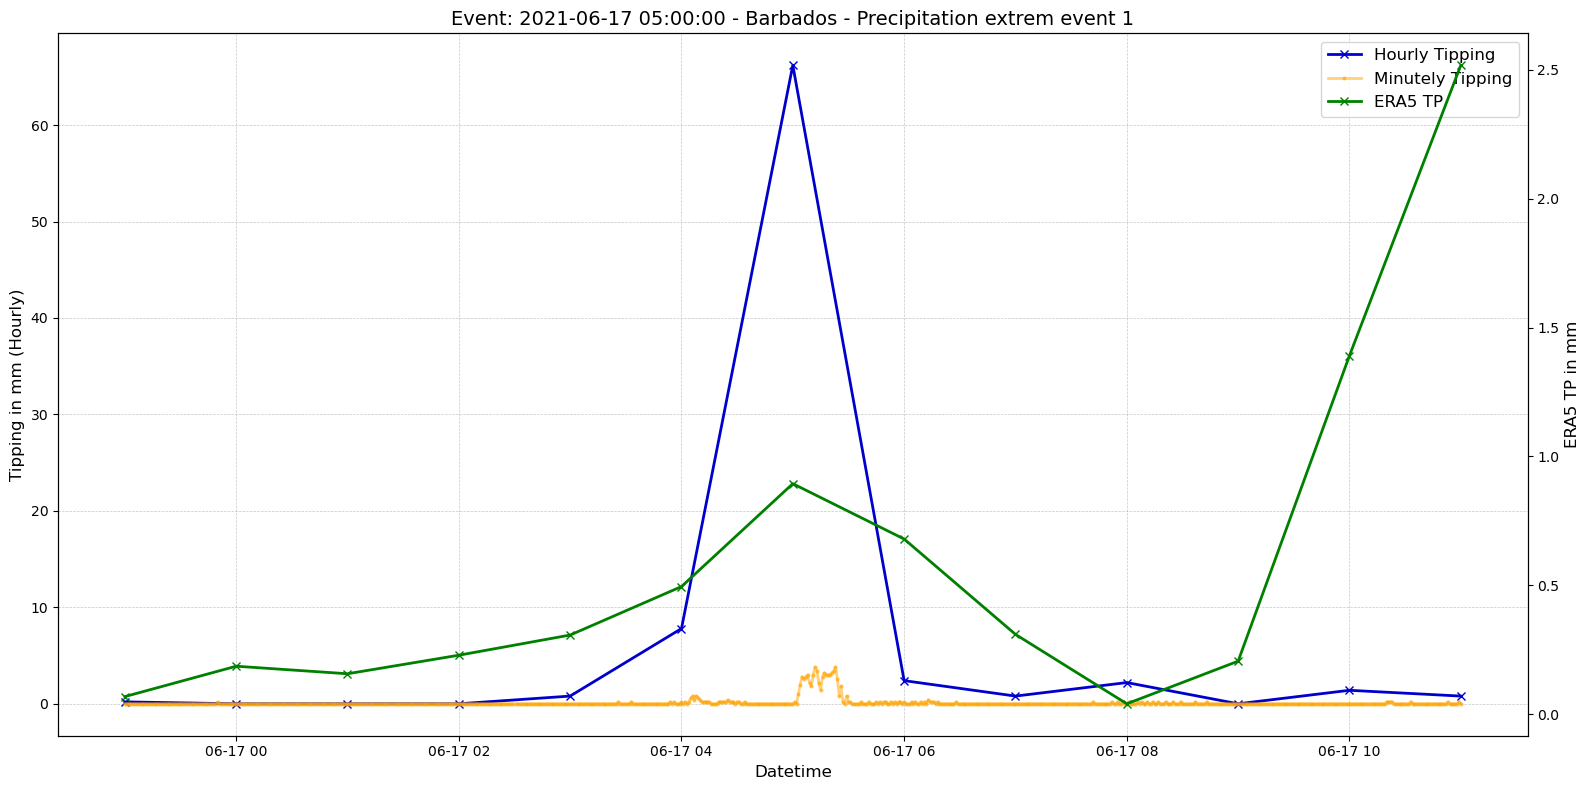

In [60]:
# Example Event 1
event_1 = pd.Timestamp(barbados_hourly_df.sort_values(by=['tipping'], ascending=False).index[0])

# Plot Event 1: Temperature Comparison
plot_event_comparison(
    event_time=event_1,
    hourly_df=barbados_hourly_df,
    minutely_df=barbados_processed_df,
    variable_hourly="tipping",       # Hourly temperature
    variable_minute="tipping",       # Minutely temperature
    era5_variable="tp",              # ERA5 2-meter temperature
    lat=13.16443  ,
    lon=-59.54316 ,
    time_window=pd.Timedelta(hours=6),
    era5_ds=era5_barbados_ds,
    same_y_axis= False,
    title_suffix="Barbados - Precipitation extrem event 1",
    save_fig=False
)





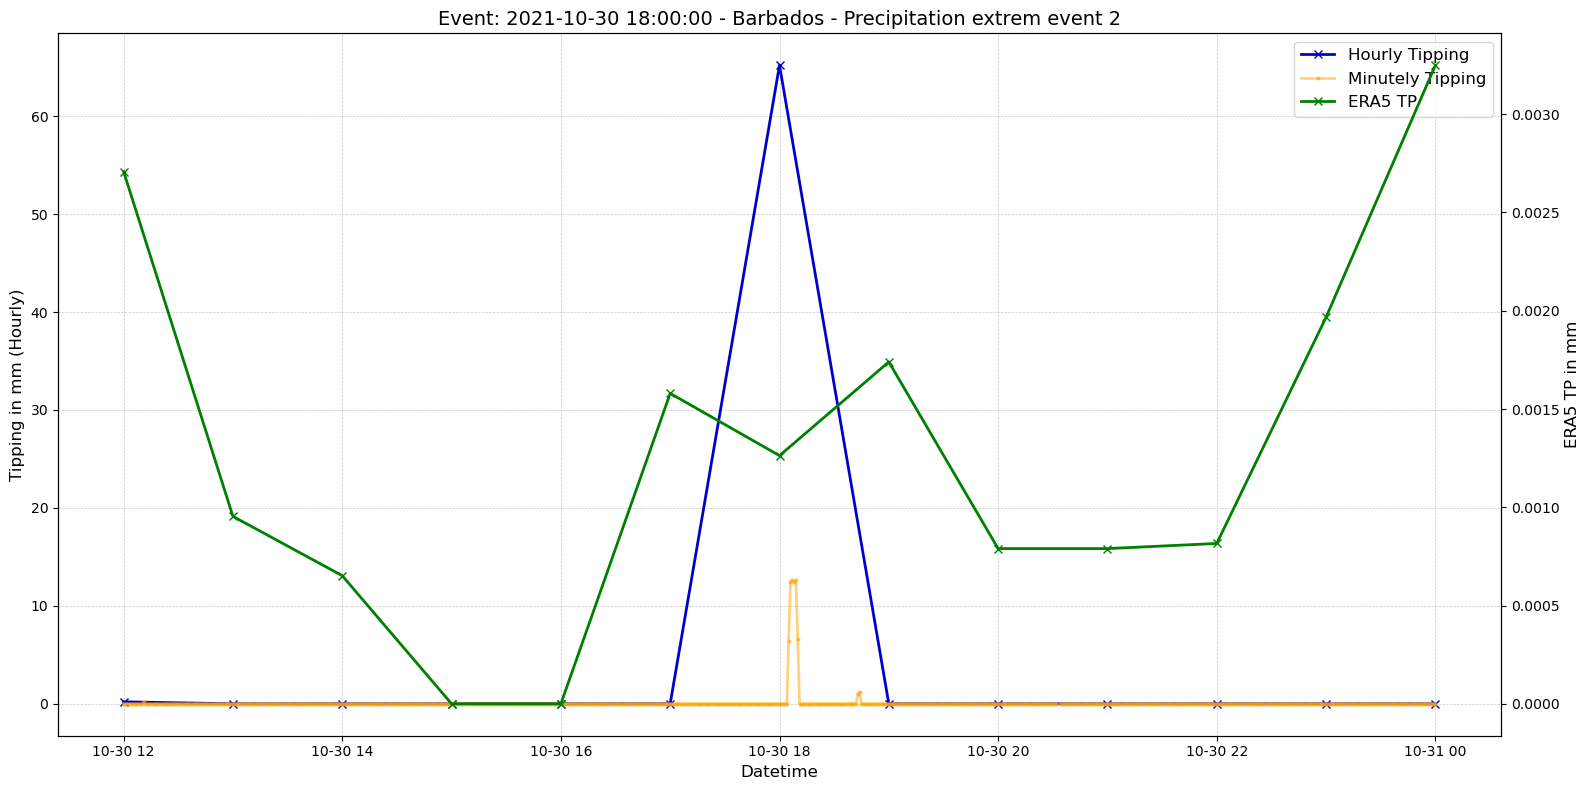

In [61]:
# Example Event 2
event_2 = pd.Timestamp(barbados_hourly_df.sort_values(by=['tipping'], ascending=False).index[1])


# Plot Event 2: Temperature Comparison
plot_event_comparison(
    event_time=event_2,
    hourly_df=barbados_hourly_df,
    minutely_df=barbados_processed_df,
    variable_hourly="tipping",       # Hourly temperature
    variable_minute="tipping",       # Minutely temperature
    era5_variable="tp",              # ERA5 2-meter temperature
    lat=13.16443  ,
    lon=-59.54316 ,
    time_window=pd.Timedelta(hours=6),
    era5_ds=era5_barbados_ds,
    same_y_axis= False,
    title_suffix="Barbados - Precipitation extrem event 2",
    save_fig=False
)



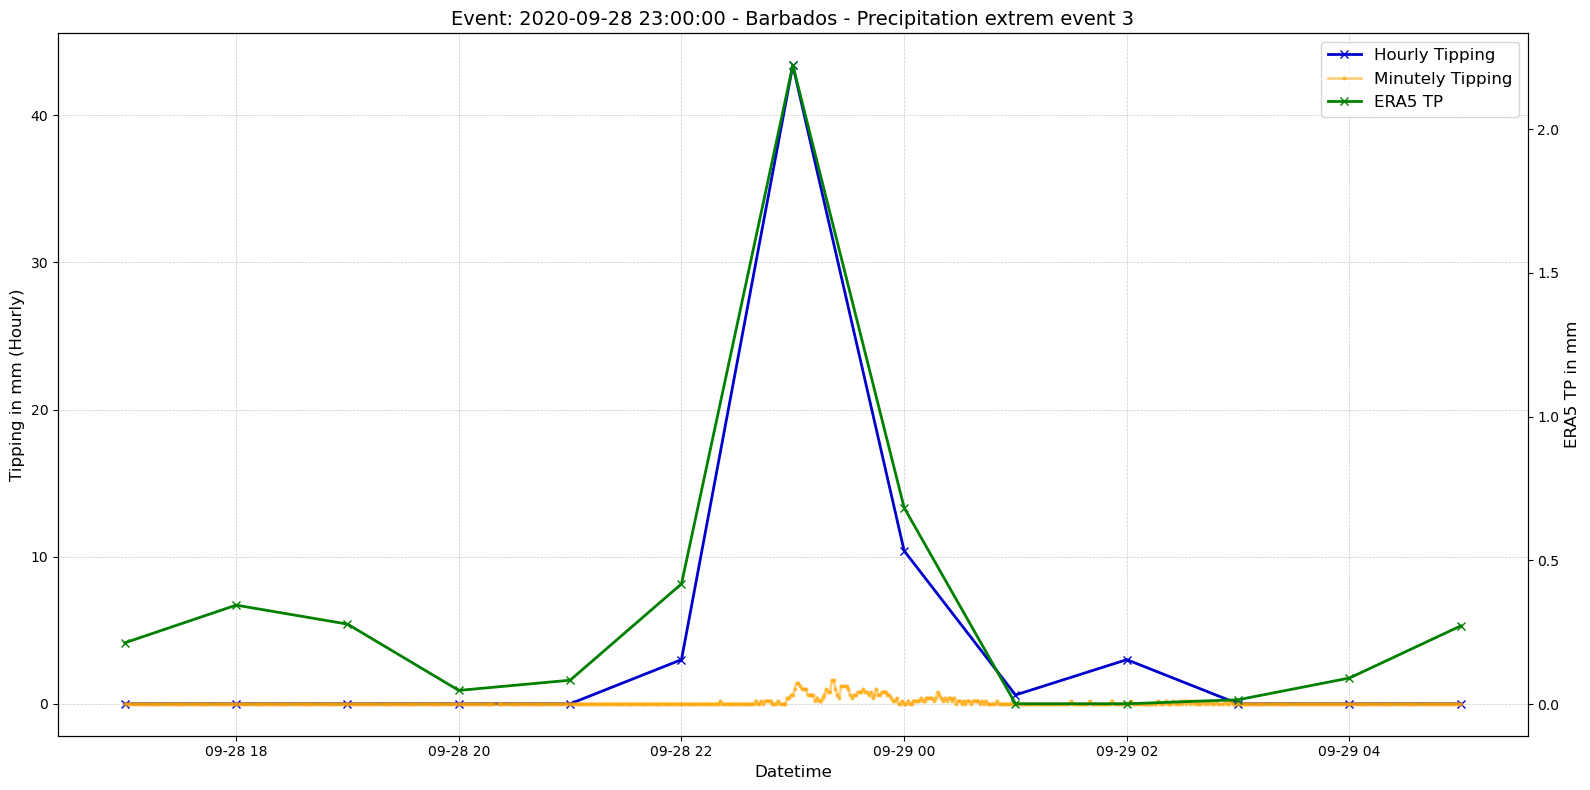

In [63]:
# Example Event 3
event_3 = pd.Timestamp(barbados_hourly_df.sort_values(by=['tipping'], ascending=False).index[2])


# Plot Event 2: Temperature Comparison
plot_event_comparison(
    event_time=event_3,
    hourly_df=barbados_hourly_df,
    minutely_df=barbados_processed_df,
    variable_hourly="tipping",       # Hourly temperature
    variable_minute="tipping",       # Minutely temperature
    era5_variable="tp",              # ERA5 2-meter temperature
    lat=13.16443  ,
    lon=-59.54316 ,
    time_window=pd.Timedelta(hours=6),
    era5_ds=era5_barbados_ds,
    same_y_axis= False,
    title_suffix="Barbados - Precipitation extrem event 3",
    save_fig=False
)



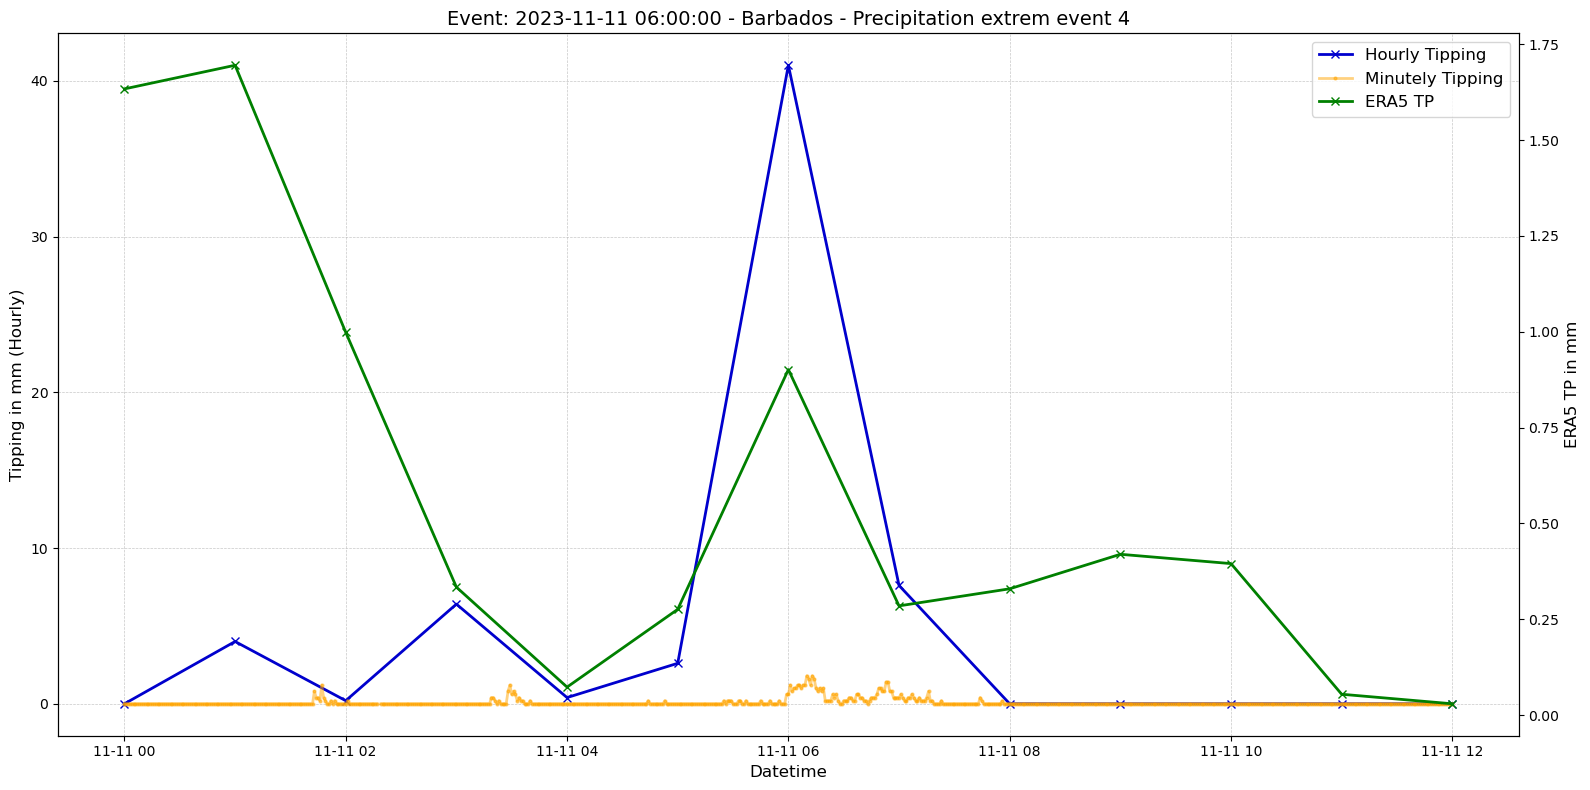

In [64]:
# Example Event 4
event_4 = pd.Timestamp(barbados_hourly_df.sort_values(by=['tipping'], ascending=False).index[3])


# Plot Event 2: Temperature Comparison
plot_event_comparison(
    event_time=event_4,
    hourly_df=barbados_hourly_df,
    minutely_df=barbados_processed_df,
    variable_hourly="tipping",       # Hourly temperature
    variable_minute="tipping",       # Minutely temperature
    era5_variable="tp",              # ERA5 2-meter temperature
    lat=13.16443  ,
    lon=-59.54316 ,
    time_window=pd.Timedelta(hours=6),
    era5_ds=era5_barbados_ds,
    same_y_axis= False,
    title_suffix="Barbados - Precipitation extrem event 4",
    save_fig=False
)


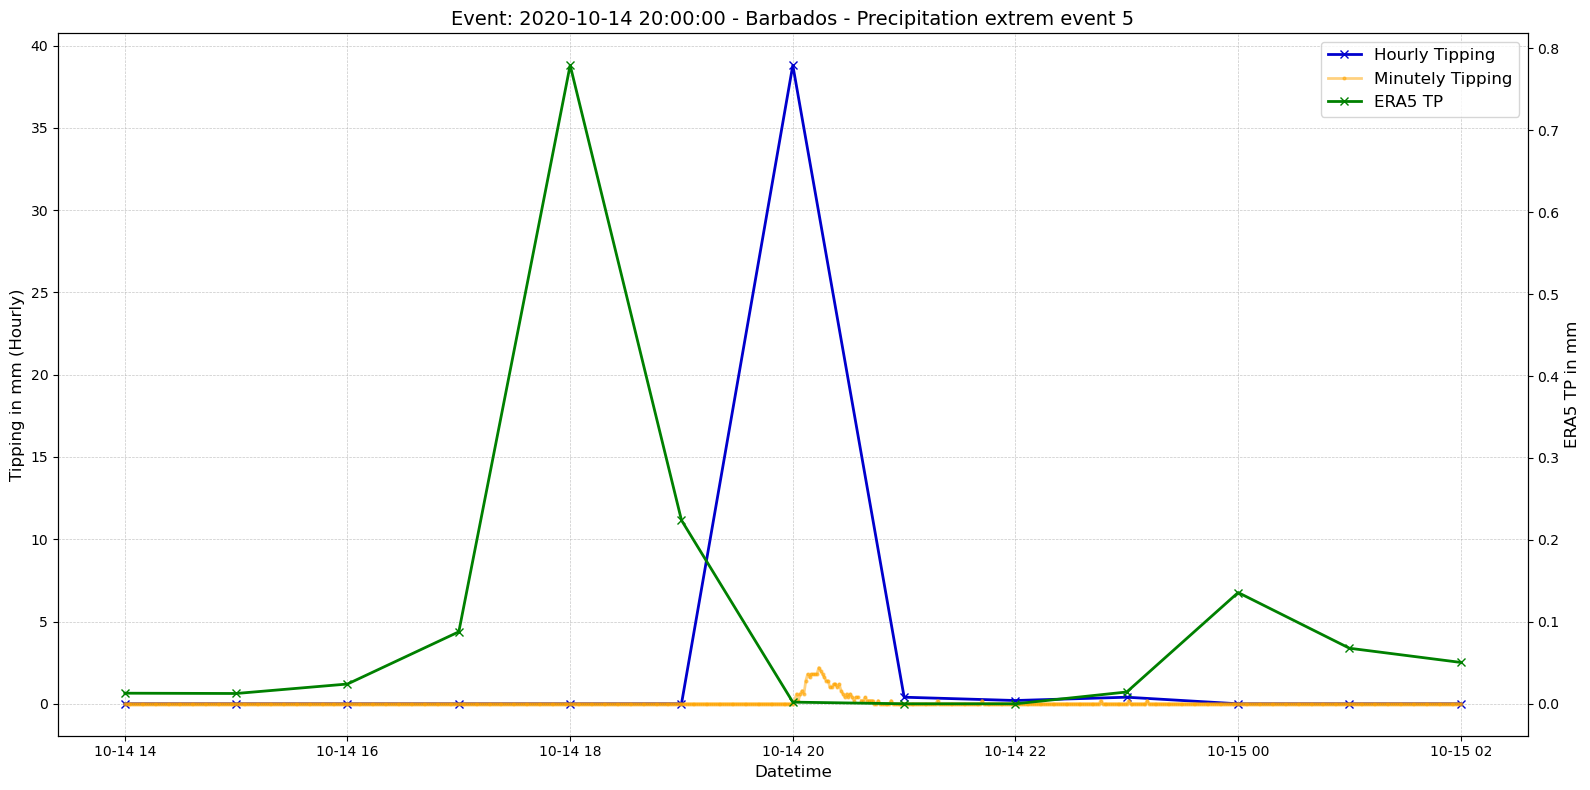

In [65]:
# Example Event 5
event_5 = pd.Timestamp(barbados_hourly_df.sort_values(by=['tipping'], ascending=False).index[4])


# Plot Event 2: Temperature Comparison
plot_event_comparison(
    event_time=event_5,
    hourly_df=barbados_hourly_df,
    minutely_df=barbados_processed_df,
    variable_hourly="tipping",       # Hourly temperature
    variable_minute="tipping",       # Minutely temperature
    era5_variable="tp",              # ERA5 2-meter temperature
    lat=13.16443  ,
    lon=-59.54316 ,
    time_window=pd.Timedelta(hours=6),
    era5_ds=era5_barbados_ds,
    same_y_axis= False,
    title_suffix="Barbados - Precipitation extrem event 5",
    save_fig=False
)


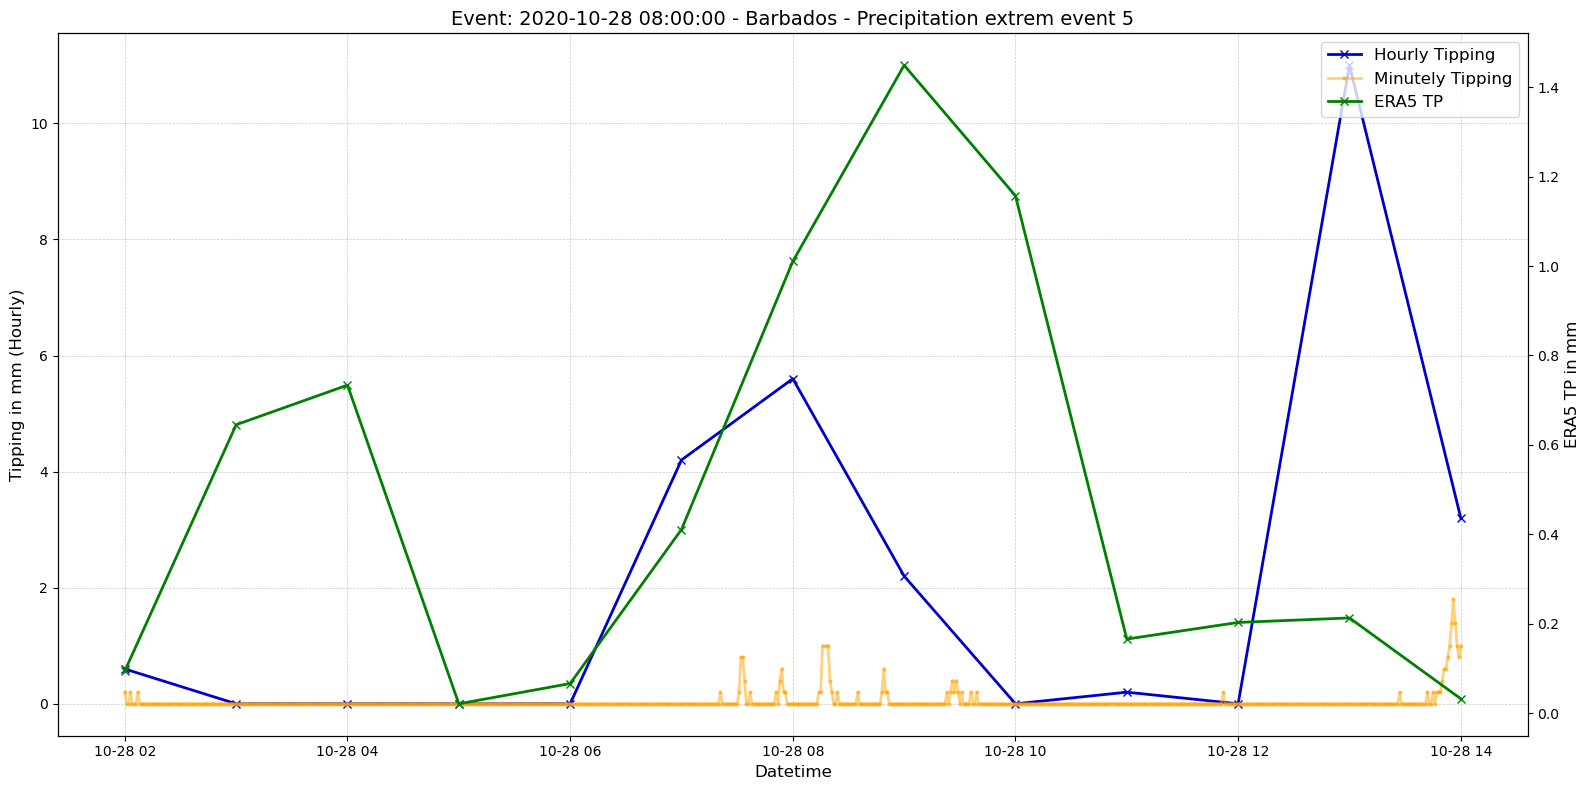

In [19]:
# Example Event 5
event_5 = pd.Timestamp(barbados_hourly_df.sort_values(by=['tipping'], ascending=False).index[225])


# Plot Event 2: Temperature Comparison
plot_event_comparison(
    event_time=event_5,
    hourly_df=barbados_hourly_df,
    minutely_df=barbados_processed_df,
    variable_hourly="tipping",       # Hourly temperature
    variable_minute="tipping",       # Minutely temperature
    era5_variable="tp",              # ERA5 2-meter temperature
    lat=13.16443  ,
    lon=-59.54316 ,
    time_window=pd.Timedelta(hours=6),
    era5_ds=era5_barbados_ds,
    same_y_axis= False,
    title_suffix="Barbados - Precipitation extrem event 5",
    save_fig=False
)

## Wind speed

In [66]:
# 5 heaviest precipitation events
barbados_hourly_df.sort_values(by=['wind_speed'], ascending=False)


bmp280_temp  bmp280_pres  bmp280_slp  htu_temp  htu_hum  \
datetime                                                                       
2022-01-24 02:00:00       23.770      984.770    1016.230     22.40     86.9   
2022-05-26 06:00:00       25.235      984.985    1016.290     16.85      NaN   
2022-04-10 18:00:00       27.240      983.820    1014.880     25.90     76.9   
2022-11-22 02:00:00          NaN          NaN         NaN       NaN      NaN   
2022-05-20 02:00:00       25.550      988.490    1019.870     17.80      NaN   
...                          ...          ...         ...       ...      ...   
2023-09-03 10:00:00          NaN          NaN         NaN       NaN      NaN   
2023-09-08 07:00:00       25.350      981.555    1012.735      8.90      NaN   
2023-09-08 08:00:00       25.400      982.090    1013.270      8.40      NaN   
2023-09-26 15:00:00       30.860      983.305    1013.965     12.05      NaN   
2023-09-26 17:00:00       30.590      981.585    1012.215     11.90      NaN   

                     mcp9808  tipping  vis_light  ir_light  uv_light  \
datetime                                                               
2022-01-24 02:00:00     22.8      0.0        NaN     253.0       NaN   
2022-05-26 06:00:00     24.4      0.0      260.0     253.0       NaN   
2022-04-10 18:00:00     26.4      0.0      513.5    2820.5     137.5   
2022-11-22 02:00:00      NaN      0.0        NaN       NaN       NaN   
2022-05-20 02:00:00     24.8      0.0      260.0     253.0       NaN   
...                      ...      ...        ...       ...       ...   
2023-09-03 10:00:00      NaN      NaN        NaN       NaN       NaN   
2023-09-08 07:00:00     23.9      0.0      260.0     254.0       NaN   
2023-09-08 08:00:00     23.9      0.0      260.0     253.0       NaN   
2023-09-26 15:00:00     29.6      0.0     1047.5    8302.0     423.5   
2023-09-26 17:00:00     29.3      0.0      911.5    6920.5     350.5   

                     wind_speed  bmp280_temp_marker  bmp280_pres_marker  \
datetime                                                                  
2022-01-24 02:00:00   74.617241                 1.0                 2.0   
2022-05-26 06:00:00   59.601000                 1.0                 2.0   
2022-04-10 18:00:00   56.670816                 1.0                 2.0   
2022-11-22 02:00:00   55.158305                 NaN                 NaN   
2022-05-20 02:00:00   49.801754                 1.0                 2.0   
...                         ...                 ...                 ...   
2023-09-03 10:00:00         NaN                 NaN                 NaN   
2023-09-08 07:00:00         NaN                 1.0                 2.0   
2023-09-08 08:00:00         NaN                 1.0                 2.0   
2023-09-26 15:00:00         NaN                 1.0                 2.0   
2023-09-26 17:00:00         NaN                 1.0                 2.0   

                     bmp280_slp_marker  htu_temp_marker  htu_hum_marker  \
datetime                                                                  
2022-01-24 02:00:00                3.0              4.0             5.0   
2022-05-26 06:00:00                3.0              4.0             NaN   
2022-04-10 18:00:00                3.0              4.0             5.0   
2022-11-22 02:00:00                NaN              NaN             NaN   
2022-05-20 02:00:00                3.0              4.0             NaN   
...                                ...              ...             ...   
2023-09-03 10:00:00                NaN              NaN             NaN   
2023-09-08 07:00:00                3.0              4.0             NaN   
2023-09-08 08:00:00                3.0              4.0             NaN   
2023-09-26 15:00:00                3.0              4.0             NaN   
2023-09-26 17:00:00                3.0              4.0             NaN   

                     mcp9808_marker  tipping_marker  vis_light_marker  \
datetime          

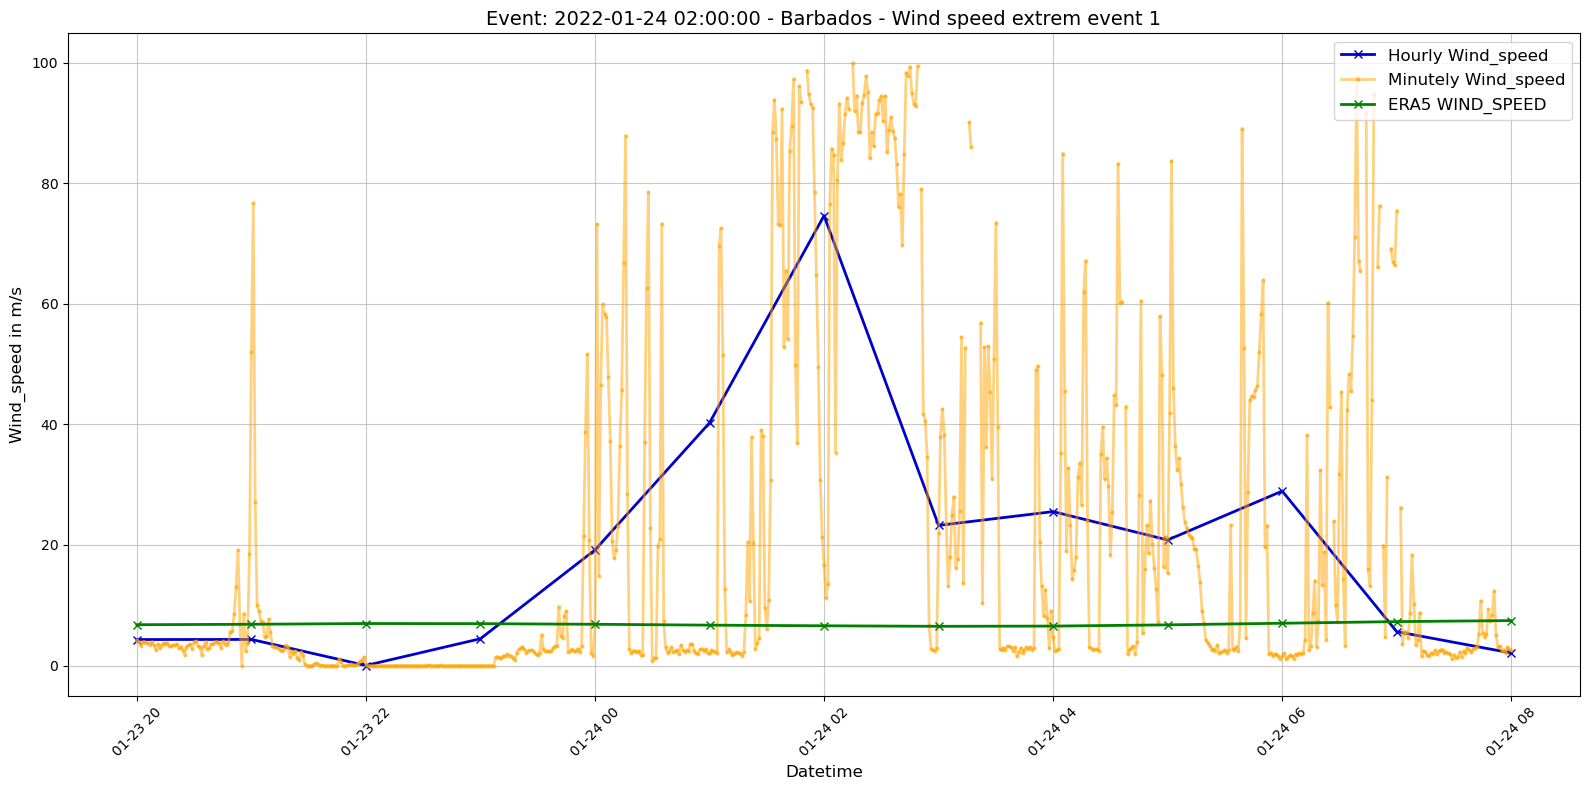

In [67]:
# Example Event 1
event_1 = pd.Timestamp(barbados_hourly_df.sort_values(by=['wind_speed'], ascending=False).index[0])


# Plot Event 2: Temperature Comparison
plot_event_comparison(
    event_time=event_1,
    hourly_df=barbados_hourly_df,
    minutely_df=barbados_processed_df,
    variable_hourly="wind_speed",       # Hourly temperature
    variable_minute="wind_speed",       # Minutely temperature
    era5_variable="wind_speed",              # ERA5 2-meter temperature
    lat=13.16443  ,
    lon=-59.54316 ,
    time_window=pd.Timedelta(hours=6),
    era5_ds=era5_barbados_ds,
    same_y_axis= True,
    title_suffix="Barbados - Wind speed extrem event 1",
    save_fig=False
)

## Temperature

In [68]:
# 5 heaviest precipitation events
barbados_hourly_df.sort_values(by=['mcp9808'], ascending=False).head()


bmp280_temp  bmp280_pres  bmp280_slp  htu_temp  htu_hum  \
datetime                                                                       
2023-09-28 17:00:00       33.300      980.355    1010.700     12.70      NaN   
2023-09-28 16:00:00       33.410      980.930    1011.275     13.10      NaN   
2023-09-28 15:00:00       33.250      981.650    1011.975     13.00      NaN   
2023-09-29 15:00:00       33.210      981.830    1012.200     12.80      NaN   
2023-09-28 18:00:00       33.145      979.665    1010.040     12.55      NaN   

                     mcp9808  tipping  vis_light  ir_light  uv_light  \
datetime                                                               
2023-09-28 17:00:00    32.20      0.0     1020.5    8132.0     409.0   
2023-09-28 16:00:00    32.20      0.0     1050.0    8305.0     425.0   
2023-09-28 15:00:00    32.10      0.0     1160.5    9585.5     484.0   
2023-09-29 15:00:00    32.10      0.0     1043.0    8301.0     421.5   
2023-09-28 18:00:00    32.05      0.0      822.5    6103.5     303.0   

                     wind_speed  bmp280_temp_marker  bmp280_pres_marker  \
datetime                                                                  
2023-09-28 17:00:00    2.078833                 1.0                 2.0   
2023-09-28 16:00:00    2.045833                 1.0                 2.0   
2023-09-28 15:00:00    1.706333                 1.0                 2.0   
2023-09-29 15:00:00    2.366667                 1.0                 2.0   
2023-09-28 18:00:00    2.094833                 1.0                 2.0   

                     bmp280_slp_marker  htu_temp_marker  htu_hum_marker  \
datetime                                                                  
2023-09-28 17:00:00                3.0              4.0             NaN   
2023-09-28 16:00:00                3.0              4.0             NaN   
2023-09-28 15:00:00                3.0              4.0             NaN   
2023-09-29 15:00:00                3.0              4.0             NaN   
2023-09-28 18:00:00                3.0              4.0             NaN   

                     mcp9808_marker  tipping_marker  vis_light_marker  \
datetime                                                                
2023-09-28 17:00:00             6.0             7.0               8.0   
2023-09-28 16:00:00             6.0             7.0               8.0   
2023-09-28 15:00:00             6.0             7.0               8.0   
2023-09-29 15:00:00             6.0             7.0               8.0   
2023-09-28 18:00:00             6.0             7.0               8.0   

                     ir_light_marker  uv_light_marker  wind_speed_marker  
datetime                                                                  
2023-09-28 17:00:00              9.0             10.0               11.0  
2023-09-28 16:00:00              9.0             10.0               11.0  
2023-09-28 15:00:00              9.0             10.0               11.0  
2023-09-29 15:00:00              9.0             10.0               11.0  
2023-09-28 18:00:00              9.0             10.0               11.0

In [69]:
# 5 heaviest precipitation events
barbados_hourly_df.sort_values(by=['mcp9808'], ascending=True).head()


bmp280_temp  bmp280_pres  bmp280_slp  htu_temp  htu_hum  \
datetime                                                                       
2022-01-09 06:00:00       21.040      987.020    1018.745     19.40    98.20   
2022-01-09 07:00:00       21.135      986.640    1018.410     19.60    97.70   
2022-01-09 00:00:00       21.475      988.680    1020.535     20.00    94.95   
2023-01-01 09:00:00       21.140      984.380    1016.110     20.35      NaN   
2022-01-11 10:00:00       21.700      985.805    1017.530     20.10    98.80   

                     mcp9808  tipping  vis_light  ir_light  uv_light  \
datetime                                                               
2022-01-09 06:00:00    19.80      5.4      260.0     253.5       NaN   
2022-01-09 07:00:00    19.90      2.8      260.0     253.0       NaN   
2022-01-09 00:00:00    20.25      0.8      260.0     253.0       2.0   
2023-01-01 09:00:00    20.40      7.4        NaN       NaN       NaN   
2022-01-11 10:00:00    20.40     10.0      263.0     290.0       3.0   

                     wind_speed  bmp280_temp_marker  bmp280_pres_marker  \
datetime                                                                  
2022-01-09 06:00:00    5.219667                 1.0                 2.0   
2022-01-09 07:00:00    5.633000                 1.0                 2.0   
2022-01-09 00:00:00    2.352000                 1.0                 2.0   
2023-01-01 09:00:00    3.379333                 1.0                 2.0   
2022-01-11 10:00:00    2.586667                 1.0                 2.0   

                     bmp280_slp_marker  htu_temp_marker  htu_hum_marker  \
datetime                                                                  
2022-01-09 06:00:00                3.0              4.0             5.0   
2022-01-09 07:00:00                3.0              4.0             5.0   
2022-01-09 00:00:00                3.0              4.0             5.0   
2023-01-01 09:00:00                3.0              4.0             NaN   
2022-01-11 10:00:00                3.0              4.0             5.0   

                     mcp9808_marker  tipping_marker  vis_light_marker  \
datetime                                                                
2022-01-09 06:00:00             6.0             7.0               8.0   
2022-01-09 07:00:00             6.0             7.0               8.0   
2022-01-09 00:00:00             6.0             7.0               8.0   
2023-01-01 09:00:00             6.0             7.0               NaN   
2022-01-11 10:00:00             6.0             7.0               8.0   

                     ir_light_marker  uv_light_marker  wind_speed_marker  
datetime                                                                  
2022-01-09 06:00:00              9.0              NaN               11.0  
2022-01-09 07:00:00              9.0              NaN               11.0  
2022-01-09 00:00:00              9.0             10.0               11.0  
2023-01-01 09:00:00              NaN              NaN               11.0  
2022-01-11 10:00:00              9.0             10.0               11.0

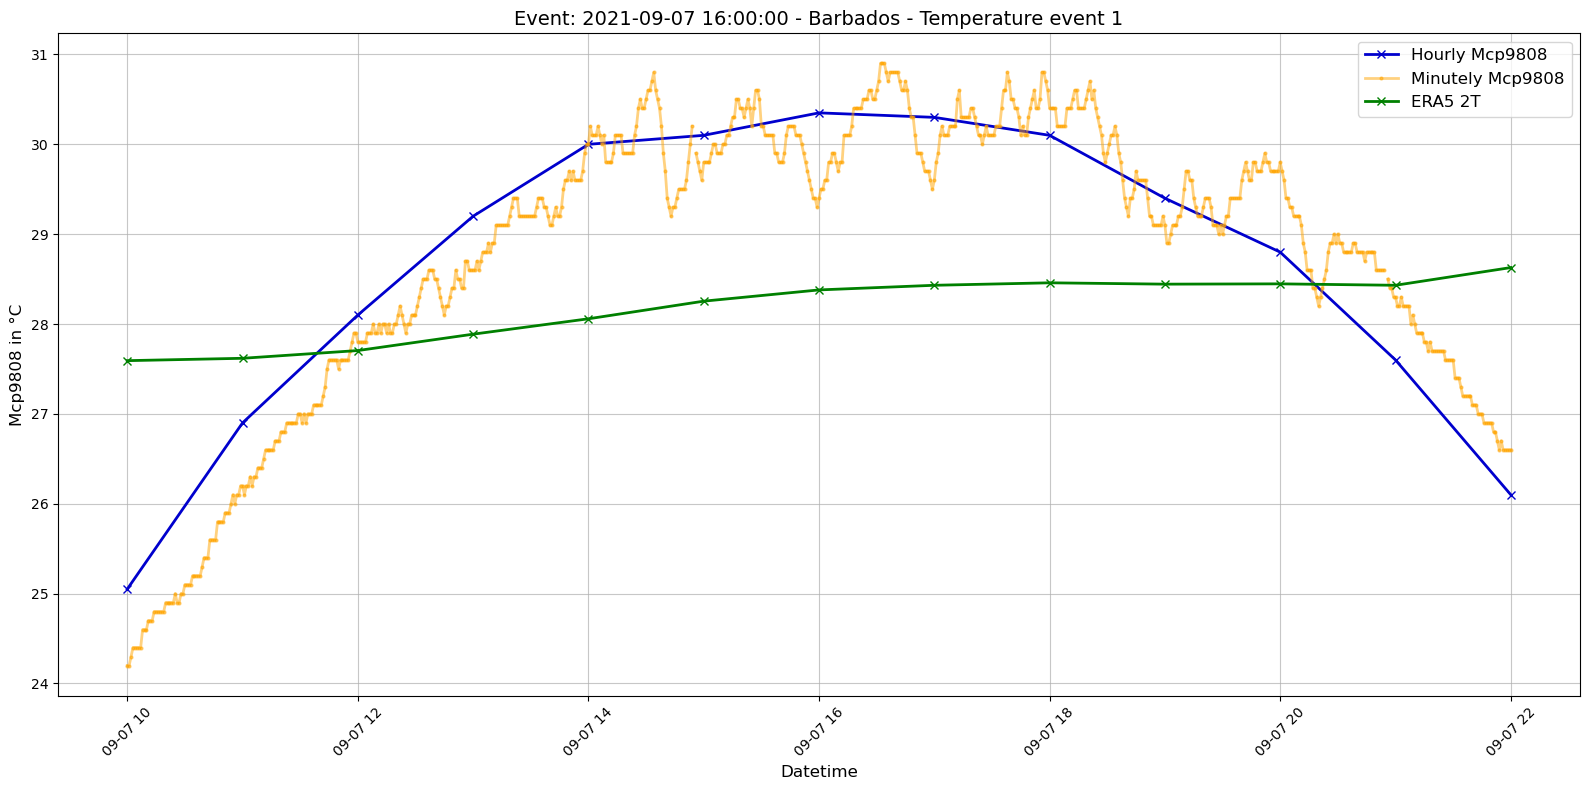

In [70]:
# Example Event 1
event_1 =  pd.Timestamp(barbados_hourly_df.sort_values(by=['mcp9808'], ascending=False).index[102])



# Plot Event 2: Temperature Comparison
plot_event_comparison(
    event_time=event_1,
    hourly_df=barbados_hourly_df,
    minutely_df=barbados_processed_df,
    variable_hourly="mcp9808",       # Hourly temperature
    variable_minute="mcp9808",       # Minutely temperature
    era5_variable="2t",              # ERA5 2-meter temperature
    lat=13.16443  ,
    lon=-59.54316 ,
    time_window=pd.Timedelta(hours=6),
    era5_ds=era5_barbados_ds,
    same_y_axis= True,
    title_suffix="Barbados - Temperature event 1",
    save_fig=False
)

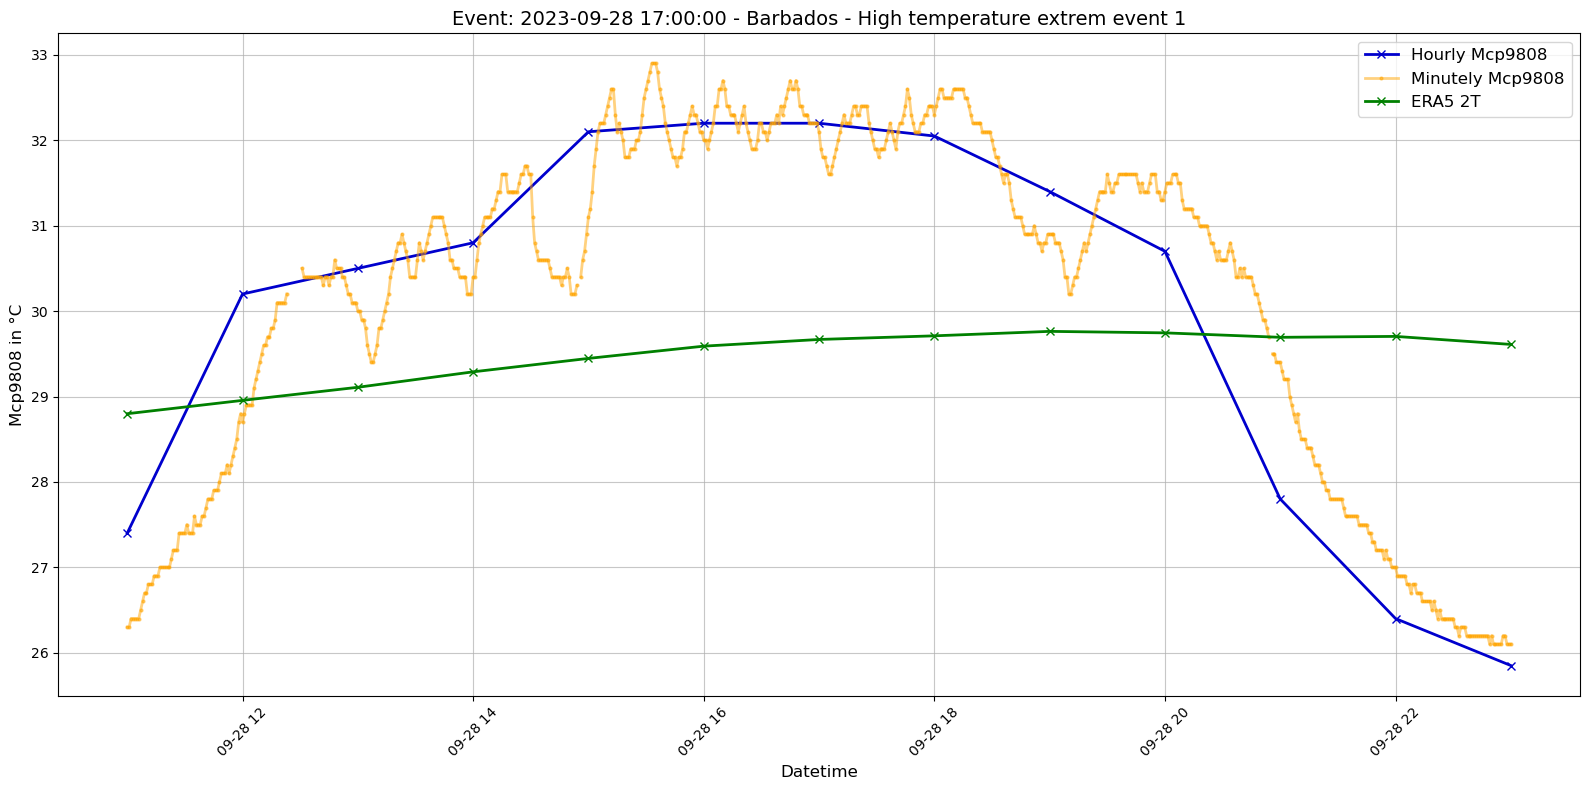

In [71]:
# Example Event 1
event_1 = pd.Timestamp(barbados_hourly_df.sort_values(by=['mcp9808'], ascending=False).index[0])


# Plot Event 2: Temperature Comparison
plot_event_comparison(
    event_time=event_1,
    hourly_df=barbados_hourly_df,
    minutely_df=barbados_processed_df,
    variable_hourly="mcp9808",       # Hourly temperature
    variable_minute="mcp9808",       # Minutely temperature
    era5_variable="2t",              # ERA5 2-meter temperature
    lat=13.16443  ,
    lon=-59.54316 ,
    time_window=pd.Timedelta(hours=6),
    era5_ds=era5_barbados_ds,
    same_y_axis= True,
    title_suffix="Barbados - High temperature extrem event 1",
    save_fig=False
)

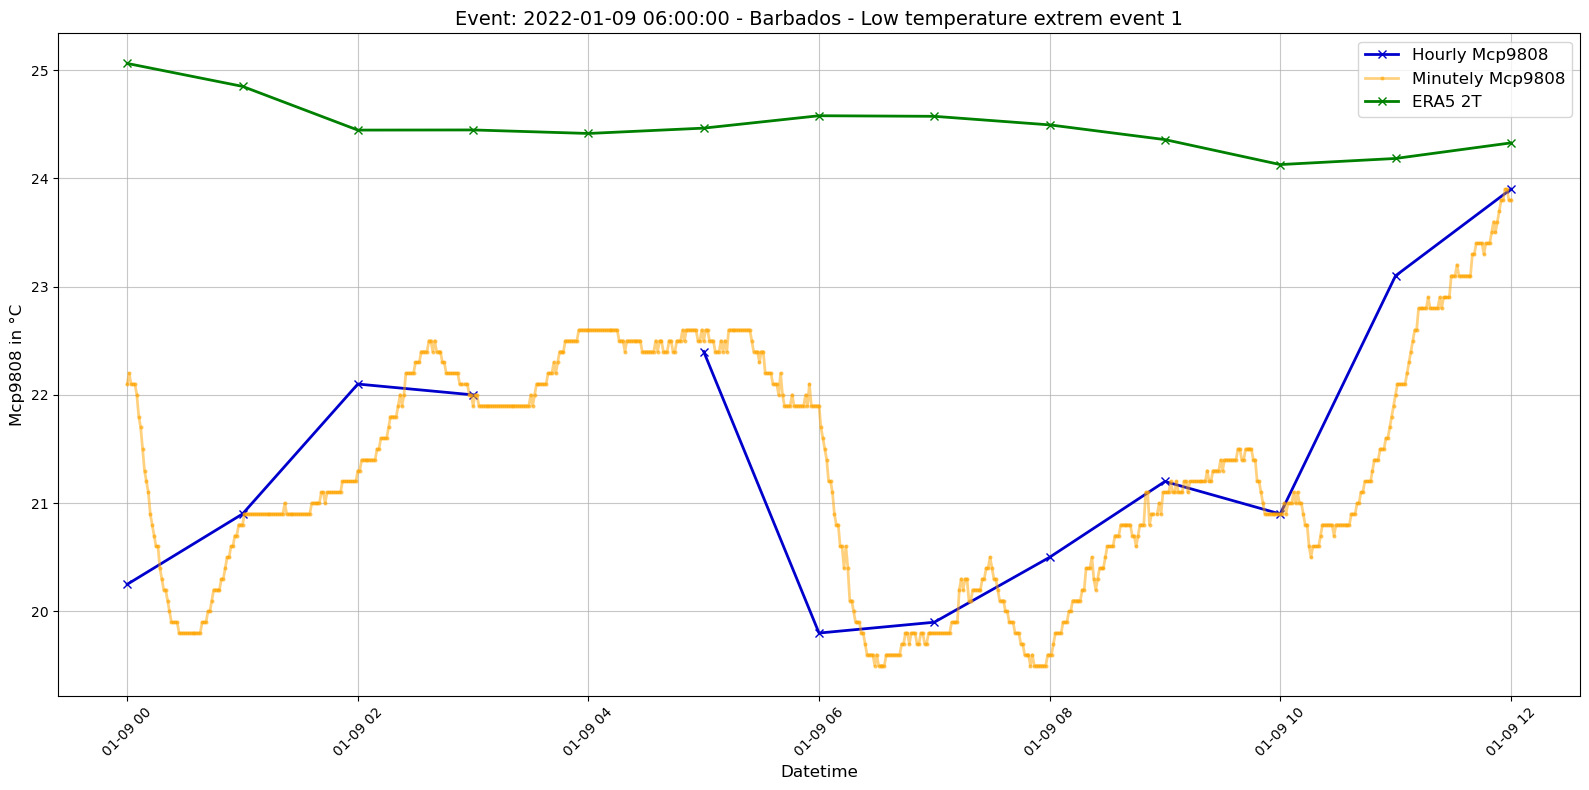

In [72]:
# Example Event 1
event_1 = pd.Timestamp(barbados_hourly_df.sort_values(by=['mcp9808'], ascending=True).index[0])


# Plot Event 2: Temperature Comparison
plot_event_comparison(
    event_time=event_1,
    hourly_df=barbados_hourly_df,
    minutely_df=barbados_processed_df,
    variable_hourly="mcp9808",       # Hourly temperature
    variable_minute="mcp9808",       # Minutely temperature
    era5_variable="2t",              # ERA5 2-meter temperature
    lat=13.16443  ,
    lon=-59.54316 ,
    time_window=pd.Timedelta(hours=6),
    era5_ds=era5_barbados_ds,
    same_y_axis= True,
    title_suffix="Barbados - Low temperature extrem event 1",
    save_fig=False
)

## Humidity

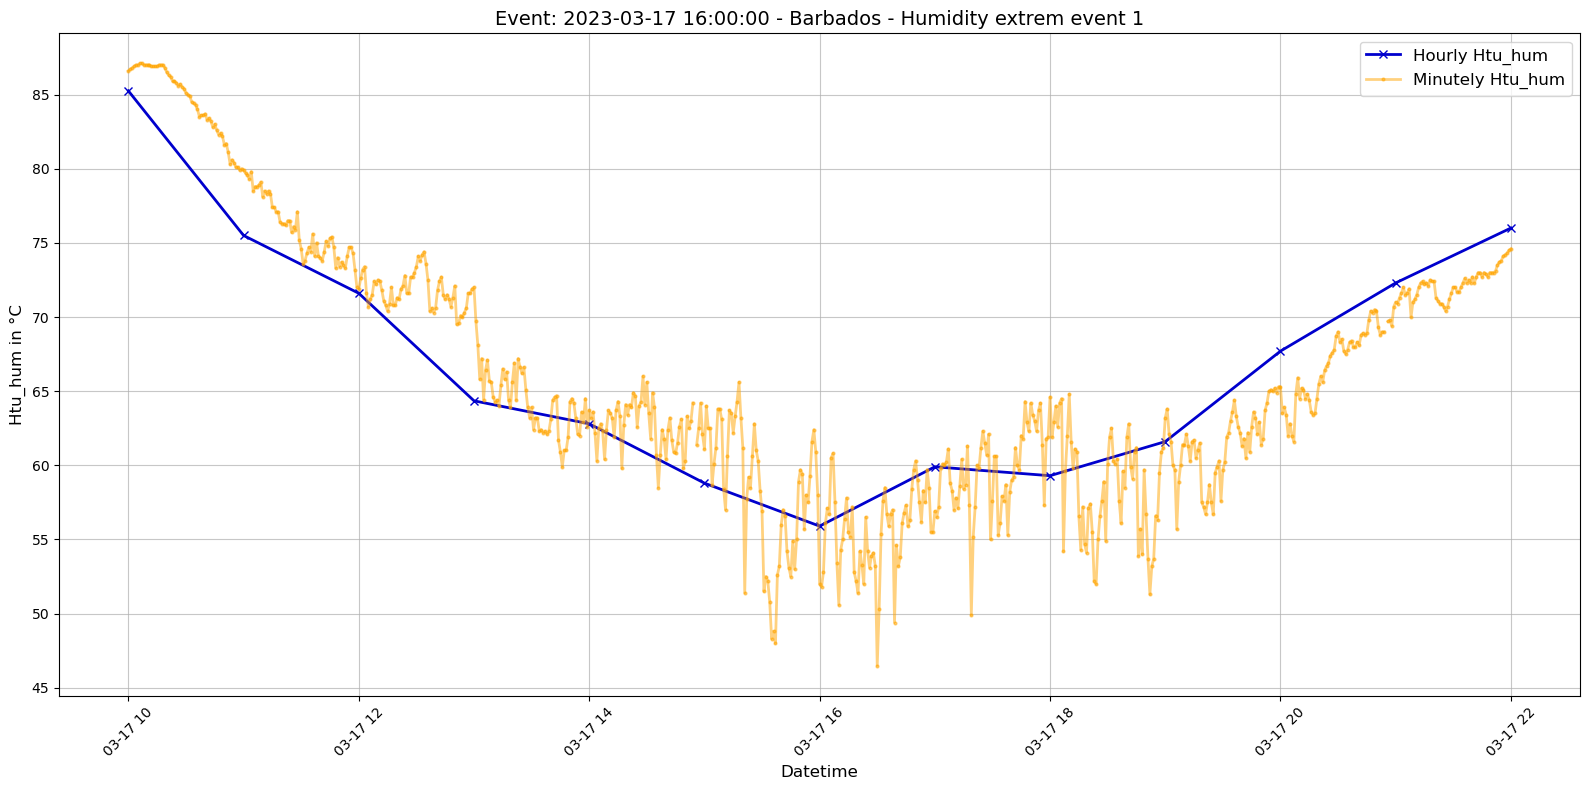

In [79]:
### Example Event 1
event_1 = pd.Timestamp(barbados_hourly_df.sort_values(by=['htu_hum'], ascending=True).index[0])


# Plot Event 2: Temperature Comparison
plot_event_comparison(
    event_time=event_1,
    hourly_df=barbados_hourly_df,
    minutely_df=barbados_processed_df,
    variable_hourly="htu_hum",       # Hourly temperature
    variable_minute="htu_hum",       # Minutely temperature
    era5_variable="2td",              # ERA5 2-meter temperature
    lat=13.16443  ,
    lon=-59.54316 ,
    time_window=pd.Timedelta(hours=6),
    same_y_axis= True,
    title_suffix="Barbados - Humidity extrem event 1",
    save_fig=False
)

## Pressure

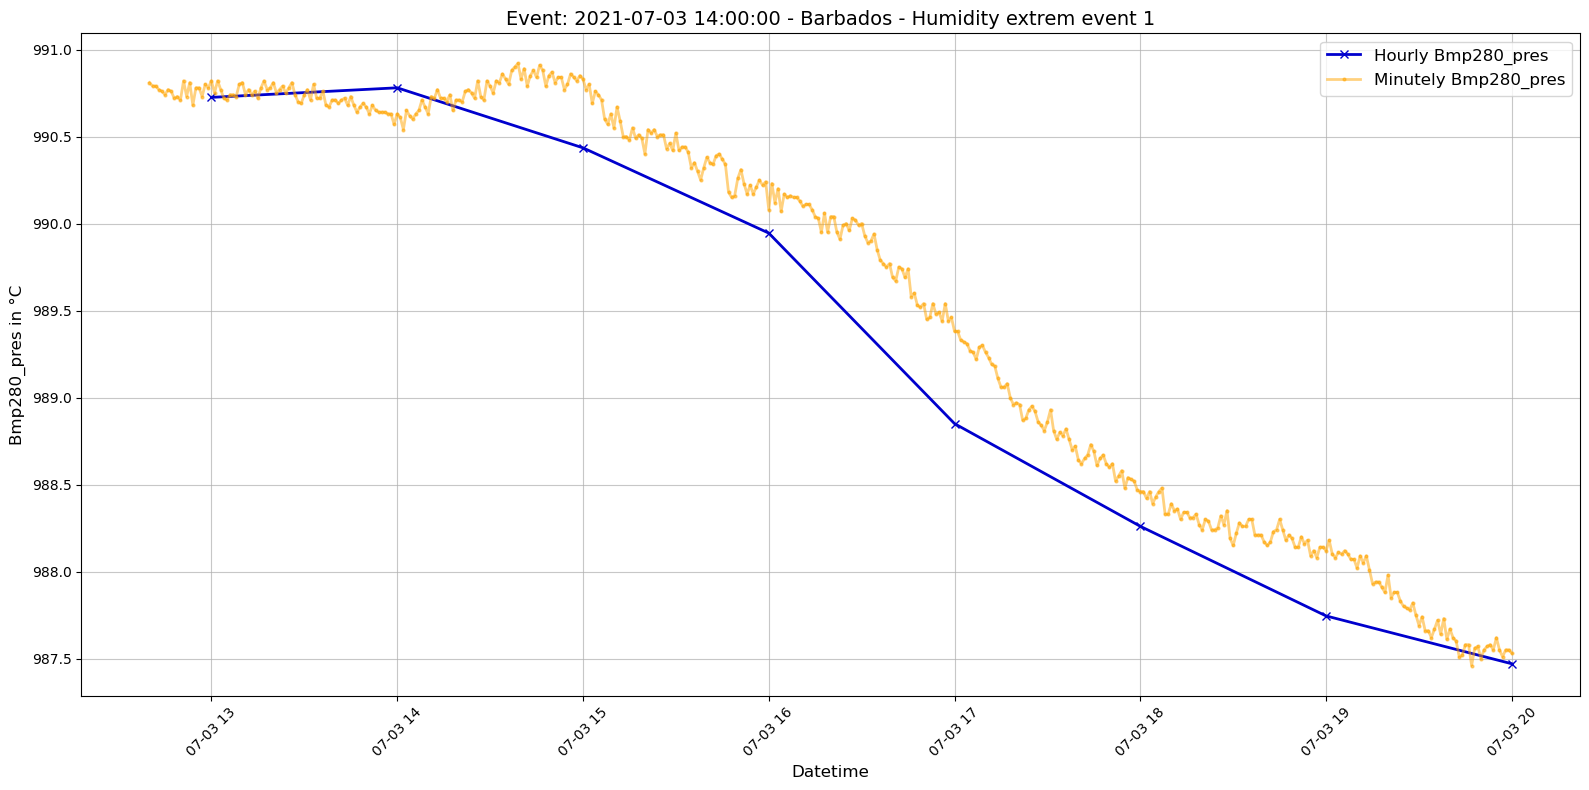

In [86]:
### Example Event 1
event_1 = pd.Timestamp(barbados_hourly_df.sort_values(by=['bmp280_pres'], ascending=False).index[0])


# Plot Event 2: Temperature Comparison
plot_event_comparison(
    event_time=event_1,
    hourly_df=barbados_hourly_df,
    minutely_df=barbados_processed_df,
    variable_hourly="bmp280_pres",       # Hourly temperature
    variable_minute="bmp280_pres",       # Minutely temperature
    era5_variable="sp",              # ERA5 2-meter temperature
    lat=13.16443  ,
    lon=-59.54316 ,
    time_window=pd.Timedelta(hours=6),
    same_y_axis= True,
    title_suffix="Barbados - Humidity extrem event 1",
    save_fig=False
)

In [85]:
era5_barbados_ds_specific = era5_barbados_ds.sel(time="2021-07-03T14:00")
era5_barbados_ds_specific.sp.values

array([[101550.875, 101169.16 , 101776.28 , 102107.91 , 101954.09 ,
        102015.625, 102024.09 , 102016.91 , 102010.72 , 102014.125,
        102020.72 , 102022.56 , 102023.59 , 102027.22 , 102021.19 ,
        102024.5  , 102026.16 ],
       [102028.03 , 101716.06 , 101389.53 , 101740.97 , 102026.78 ,
        102014.44 , 101995.375, 102008.66 , 102010.31 , 102005.19 ,
        102009.91 , 102016.66 , 102017.56 , 102020.03 , 102020.47 ,
        102022.625, 102020.78 ],
       [101981.625, 101635.72 , 101035.125, 101530.59 , 102055.66 ,
        102006.53 , 101986.28 , 102000.125, 102000.25 , 102002.09 ,
        101997.125, 102001.625, 102014.72 , 102013.   , 102013.91 ,
        102016.66 , 102014.5  ],
       [101997.53 , 101879.97 , 101640.16 , 101932.   , 101987.28 ,
        101956.625, 101995.28 , 102000.44 , 101981.125, 101990.   ,
        101983.34 , 101987.34 , 101989.81 , 101999.5  , 102000.19 ,
        102007.97 , 102009.81 ],
       [102043.31 , 101888.25 , 101687.   , 101916.4

# Comparison to other Datasources

In [90]:
vienna_geopherestation_df.max()

station    5925.0
ff           13.4
rr           39.1
rrm          60.0
rr_flag      10.0
tl           38.5
dtype: float64

In [ ]:
vienna_processed_df = pd.read_csv("station_data_processed/vienna_hourly_processed_data.csv", index_col=0)
vienna_processed_df.index = pd.to_datetime(vienna_processed_df.index, errors='coerce')

# Apply the  aggregation
vienna_hourly_df = apply_aggregation(vienna_processed_df)

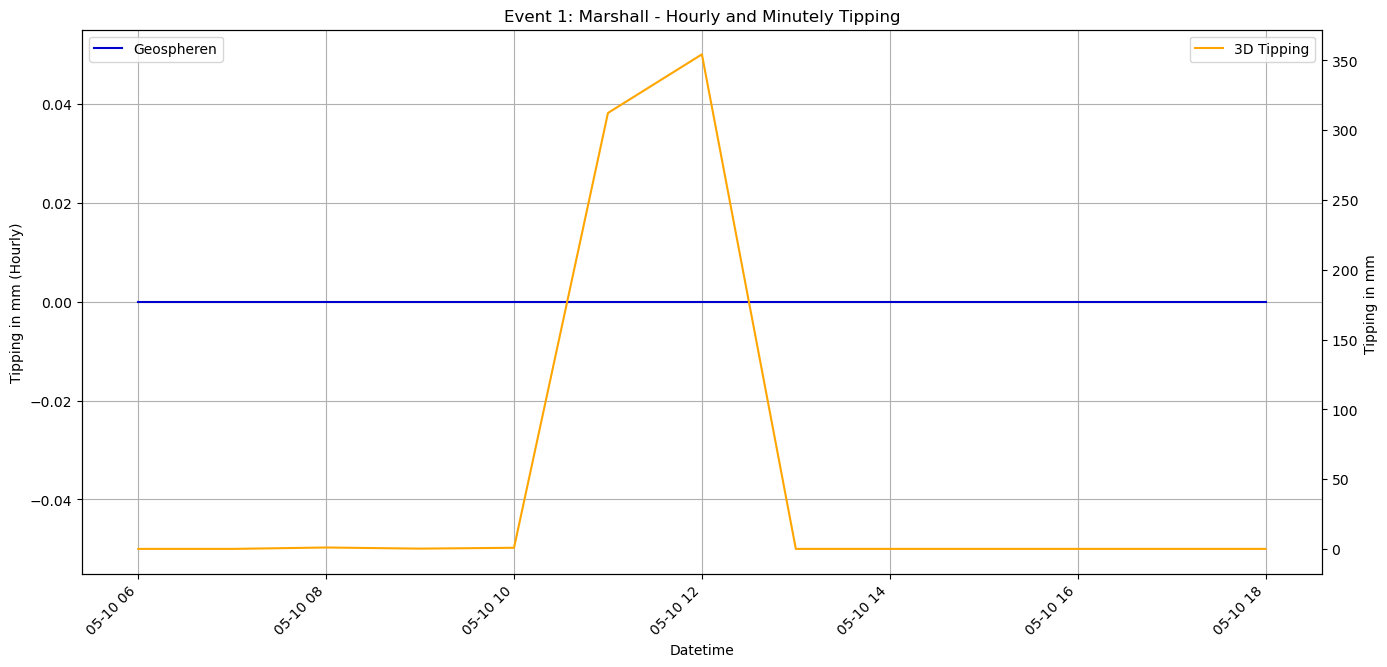

In [92]:
# Create the figure and the first axis

event_1 = pd.Timestamp("2018-05-10 12:00:00")

# measured 468 l/m2 in 1 h and the following hour measured 105 l/m2
# utc in local time 10:00

# Create a time window of 6 hours before and after the event
time_delta = pd.Timedelta(hours=6)

# Apply the filter using the time window
filtered_df_vg = vienna_geopherestation_df[(vienna_geopherestation_df.index >= event_1 - time_delta) & (vienna_geopherestation_df.index <= event_1 + time_delta)]
filtered_df =   vienna_hourly_df[(vienna_hourly_df.index >= event_1 - time_delta) & (vienna_hourly_df.index <= event_1 + time_delta)]

# View the filtered DataFrame
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot on the first y-axis (ax1)
ax1.plot(filtered_df_vg["rr"], color='mediumblue', label="Geospheren")
ax1.set_xlabel("Datetime")
ax1.set_ylabel("Tipping in mm (Hourly)")
ax1.tick_params(axis='y')
ax1.grid(True)
ax1.legend(loc="upper left")

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot on the second y-axis (ax2)
ax2.plot(filtered_df["tipping"], color='orange', label="3D Tipping")
ax2.set_ylabel("Tipping in mm ")
ax2.tick_params(axis='y')

fig.autofmt_xdate(rotation=45)
plt.legend()

# Set the title
plt.title("Event 1: Marshall - Hourly and Minutely Tipping")

# Show the plot
plt.show()

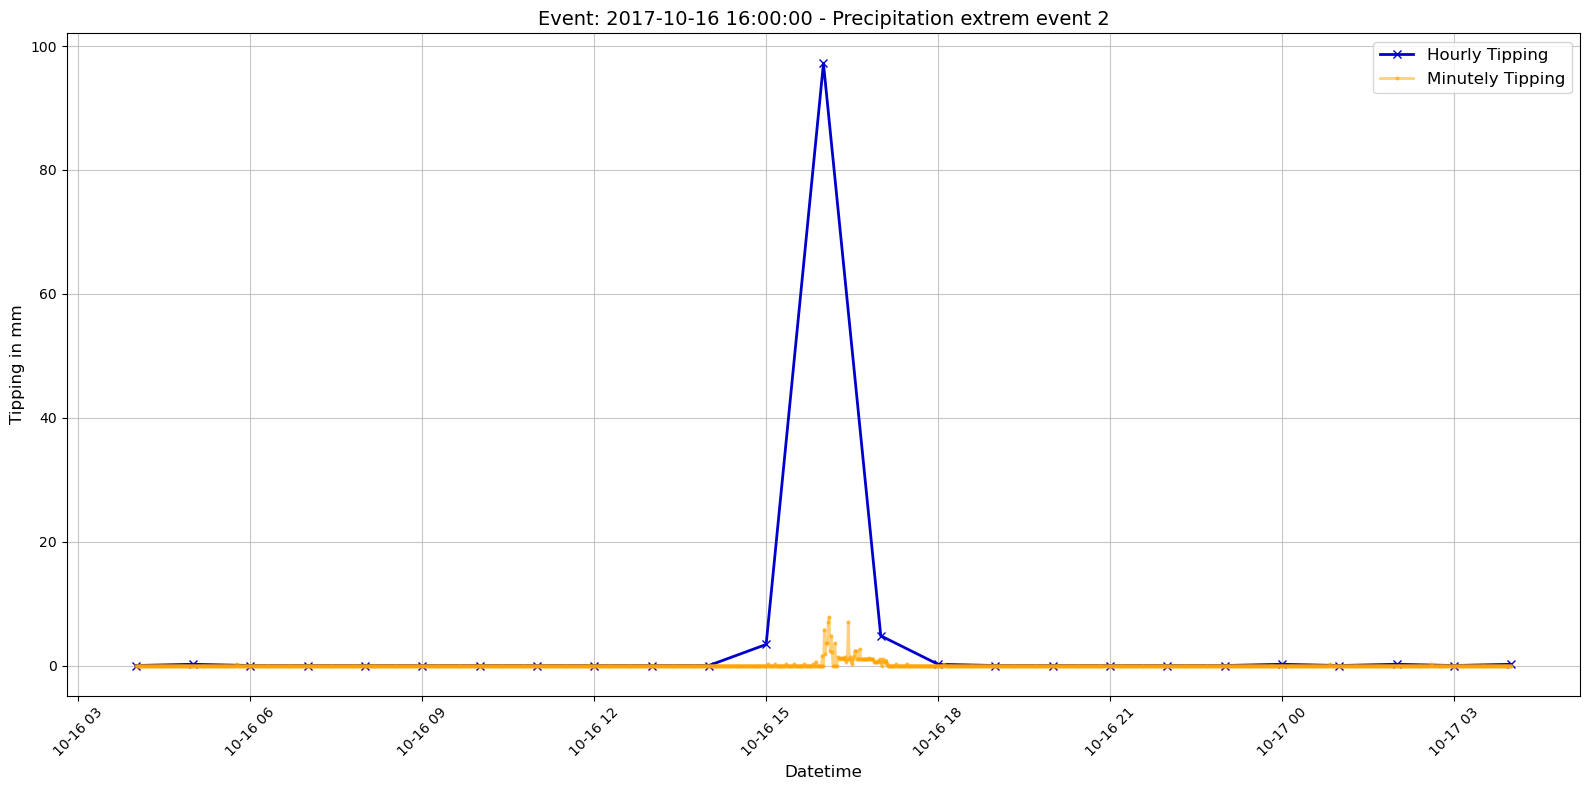

In [93]:
# Example Event 1
event_2 = pd.Timestamp("2017-10-16 16:00:00")

# Plot Event 1: Temperature Comparison
plot_event_comparison(
    event_time=event_2,
    hourly_df=vienna_hourly_df,
    minutely_df=vienna_processed_df,
    variable_hourly="tipping",       # Hourly temperature
    variable_minute="tipping",       # Minutely temperature
    era5_variable="tipping",              # ERA5 2-meter temperature
    lat=13.16443 ,
    lon=-59.54316,
    time_window=pd.Timedelta(hours=12),
    same_y_axis=True,
    title_suffix="Precipitation extrem event 2",
    save_fig=False
)

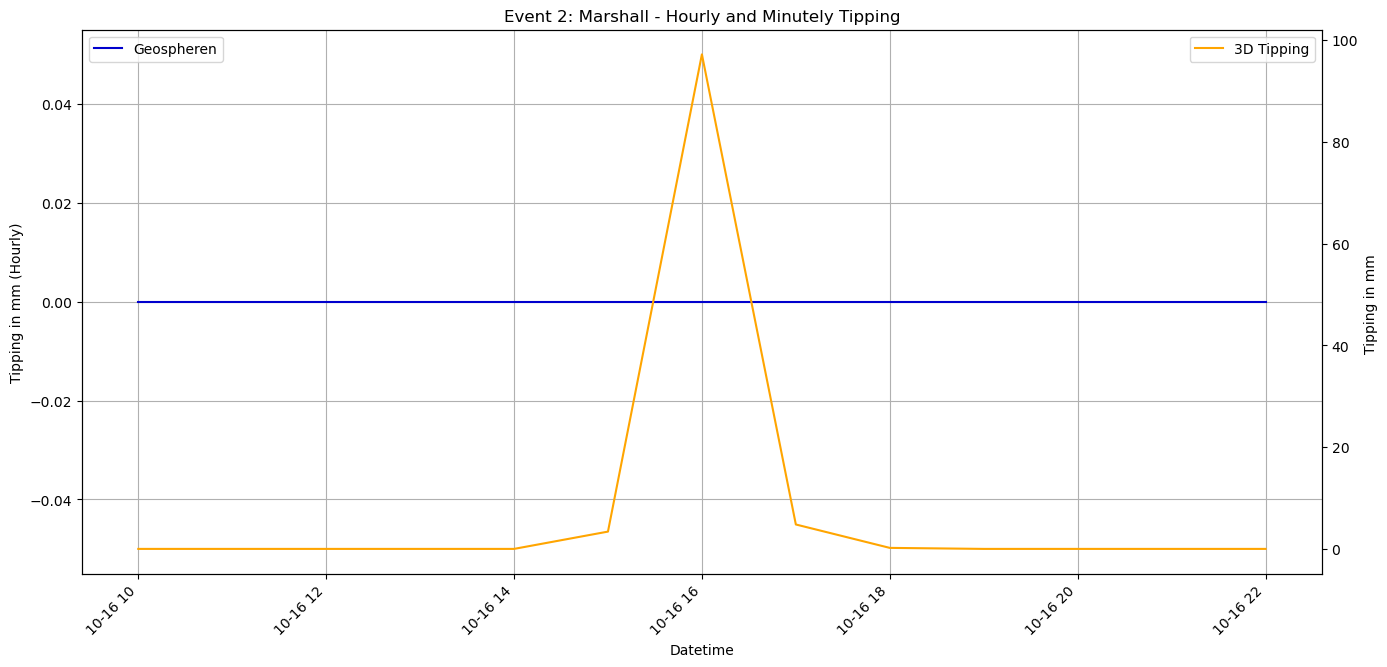

In [96]:
# Create the figure and the first axis
event_2 = pd.Timestamp("2017-10-16 16:00:00")

# Create a time window of 6 hours before and after the event
time_delta = pd.Timedelta(hours=6)

# Apply the filter using the time window
filtered_df_vg = vienna_geopherestation_df[(vienna_geopherestation_df.index >= event_2 - time_delta) & (vienna_geopherestation_df.index <= event_2 + time_delta)]
filtered_df =   vienna_hourly_df[(vienna_hourly_df.index >= event_2 - time_delta) & (vienna_hourly_df.index <= event_2 + time_delta)]

# View the filtered DataFrame
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot on the first y-axis (ax1)
ax1.plot(filtered_df_vg["rr"], color='mediumblue', label="Geospheren")
ax1.set_xlabel("Datetime")
ax1.set_ylabel("Tipping in mm (Hourly)")
ax1.tick_params(axis='y')
ax1.grid(True)
ax1.legend(loc="upper left")

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot on the second y-axis (ax2)
ax2.plot(filtered_df["tipping"], color='orange', label="3D Tipping")
ax2.set_ylabel("Tipping in mm ")
ax2.tick_params(axis='y')

fig.autofmt_xdate(rotation=45)
plt.legend()

# Set the title
plt.title("Event 2: Marshall - Hourly and Minutely Tipping")

# Show the plot
plt.show()

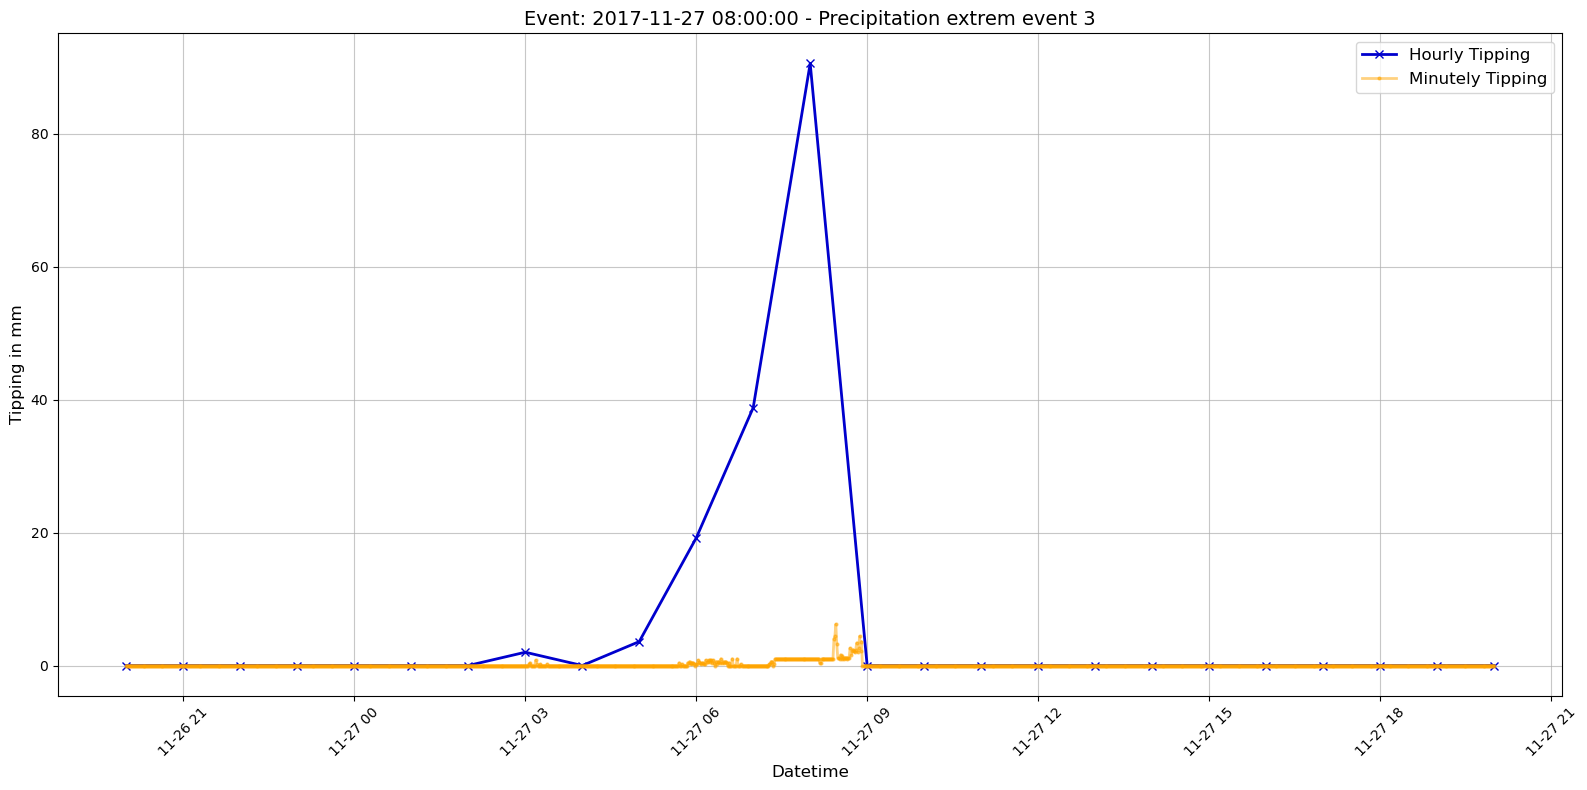

In [97]:
# Example Event 1
event_3 = pd.Timestamp("2017-11-27 08:00:00")

# Plot Event 1: Temperature Comparison
plot_event_comparison(
    event_time=event_3,
    hourly_df=vienna_hourly_df,
    minutely_df=vienna_processed_df,
    variable_hourly="tipping",       # Hourly temperature
    variable_minute="tipping",       # Minutely temperature
    era5_variable="tipping",              # ERA5 2-meter temperature
    lat=13.16443 ,
    lon=-59.54316,
    time_window=pd.Timedelta(hours=12),
    same_y_axis=True,
    title_suffix="Precipitation extrem event 3",
    save_fig=False
)

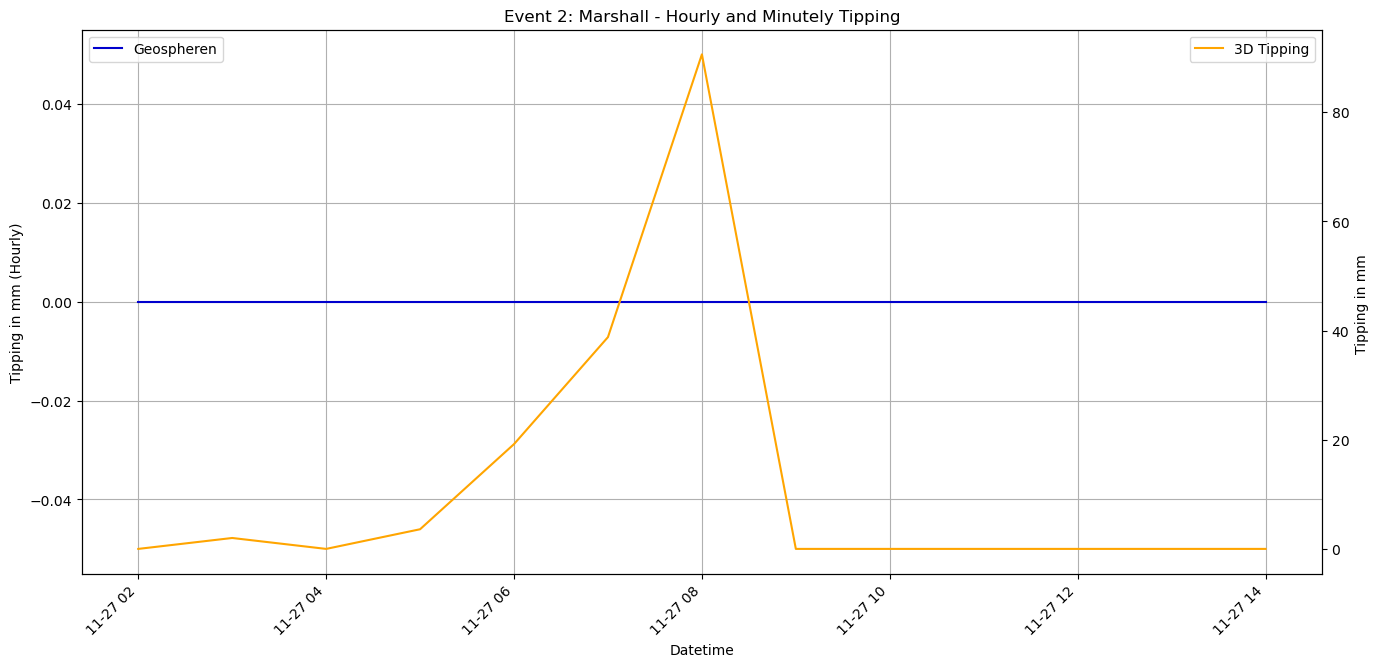

In [98]:
# Create the figure and the first axis

# Create a time window of 6 hours before and after the event
time_delta = pd.Timedelta(hours=6)

# Apply the filter using the time window
filtered_df_vg = vienna_geopherestation_df[(vienna_geopherestation_df.index >= event_3 - time_delta) & (vienna_geopherestation_df.index <= event_3 + time_delta)]
filtered_df =   vienna_hourly_df[(vienna_hourly_df.index >= event_3 - time_delta) & (vienna_hourly_df.index <= event_3 + time_delta)]

# View the filtered DataFrame
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot on the first y-axis (ax1)
ax1.plot(filtered_df_vg["rr"], color='mediumblue', label="Geospheren")
ax1.set_xlabel("Datetime")
ax1.set_ylabel("Tipping in mm (Hourly)")
ax1.tick_params(axis='y')
ax1.grid(True)
ax1.legend(loc="upper left")

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot on the second y-axis (ax2)
ax2.plot(filtered_df["tipping"], color='orange', label="3D Tipping")
ax2.set_ylabel("Tipping in mm ")
ax2.tick_params(axis='y')

fig.autofmt_xdate(rotation=45)
plt.legend()

# Set the title
plt.title("Event 2: Marshall - Hourly and Minutely Tipping")

# Show the plot
plt.show()

In [75]:
print(era5_barbados_ds.dims)
print(era5_barbados_ds.coords)
event_1 = pd.Timestamp(barbados_hourly_df.sort_values(by=['tipping'], ascending=False).index[0])
print(event_1)

FrozenMappingWarningOnValuesAccess({'time': 28584, 'lon': 9, 'lat': 9})
Coordinates:
  * time     (time) datetime64[ns] 229kB 2020-09-27 ... 2022-12-31T23:00:00
  * lon      (lon) float64 72B -60.54 -60.29 -60.04 ... -59.04 -58.79 -58.54
  * lat      (lat) float64 72B 14.17 13.91 13.66 13.41 ... 12.66 12.41 12.16
2021-06-17 05:00:00


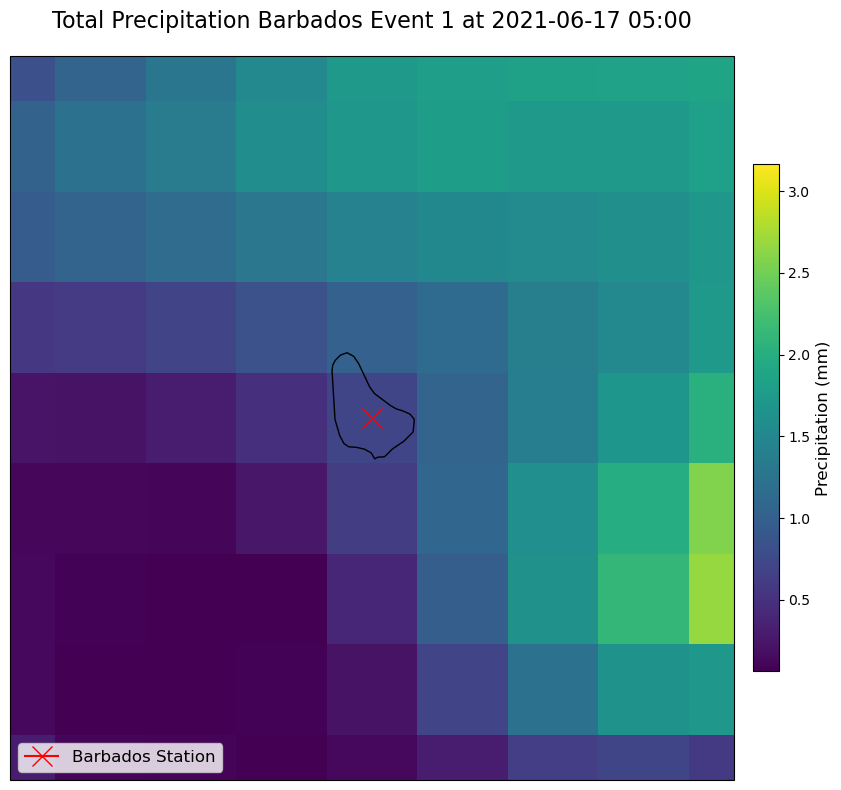

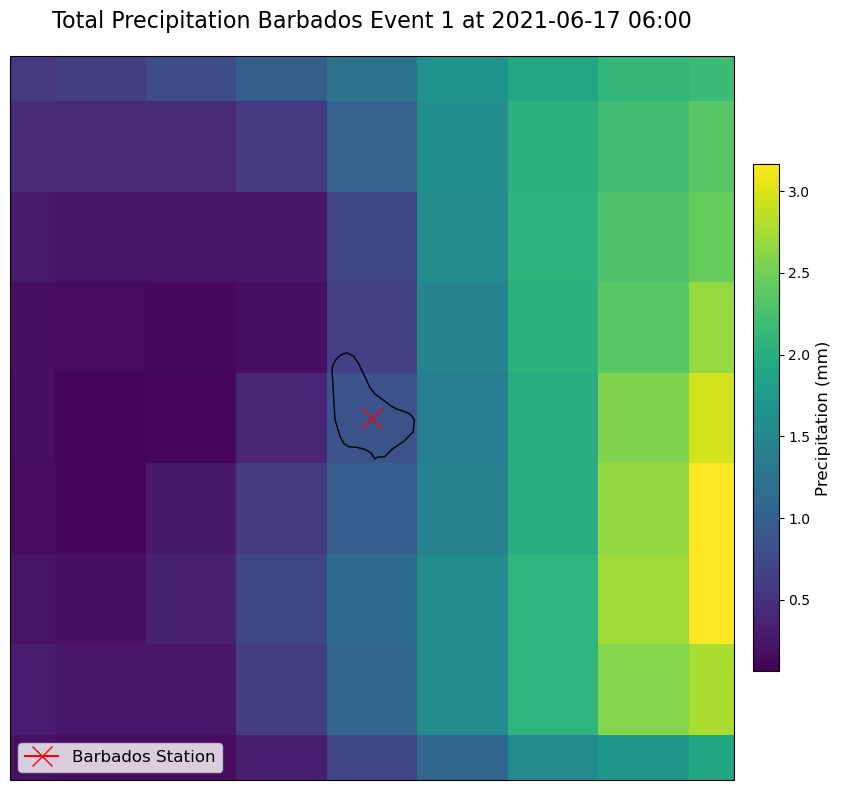

In [81]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the variable and coordinate names
var = 'tp'
lat = era5_barbados_ds.lat.values
lon = era5_barbados_ds.lon.values

# Coordinates of the specific point (Vienna Station)
point_lon = -59.54316 
point_lat = 13.16443 

# Select the time range
selected_data = era5_barbados_ds.sel(time=slice("2021-06-17 05:00","2021-06-17 06:00"))

# Create a meshgrid for pcolormesh
Lon, Lat = np.meshgrid(lon, lat)

# Define plot parameters
cmap = 'viridis'
vmin = selected_data[var].min().item()
vmax = selected_data[var].max().item()
title_base = 'Total Precipitation Barbados Event 1'

for t in selected_data.time:
    # Create a new figure with Cartopy's PlateCarree projection
    fig, ax = plt.subplots(
        figsize=(10, 8),
        subplot_kw={'projection': ccrs.PlateCarree()}
    )
    
    # Extract data for the current time step
    data = selected_data[var].sel(time=t).values
    
    # Handle missing or invalid data
    data = np.ma.masked_invalid(data)
    
    # Plot the data using pcolormesh
    pcm = ax.pcolormesh(
        Lon, Lat, data, 
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        transform=ccrs.PlateCarree()
    )
        # Set the map extent based on data

    
    # Add coastlines and borders
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)

    # Plot the specific point (Vienna Station)
    ax.plot(
        point_lon, point_lat,
        marker='x', color='red', markersize=14,
        transform=ccrs.PlateCarree(),
        label='Barbados Station'
    )


    extent = [lon.min(), lon.max(), lat.min(), lat.max()]
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    
    # Add a colorbar
    cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', pad=0.02, shrink=0.7)
    cbar.set_label('Precipitation (mm)', fontsize=12)
    
    # Set title with time information
    time_str = pd.to_datetime(t.values).strftime('%Y-%m-%d %H:%M')
    plt.title(f'{title_base} at {time_str}', fontsize=16, pad=20)
    
    # Add legend for the Vienna Station marker
    ax.legend(loc='lower left', fontsize=12)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    # Close the figure to free memory
    plt.close(fig)